In [1]:
from sklearn.preprocessing import minmax_scale

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext lab_black

In [3]:
import glob

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [5]:
df = pd.read_csv("cistarget/individual_tech_cistopic_objects.NOMINNES.ctx", sep="\t")

In [6]:
df["sample"] = [x.split("__")[0] for x in df["#GeneSignatureID"]]

In [7]:
df["sample"] = [
    x.replace("CNA_10xv11_4", "CNA_10xv11c_1")
    .replace("CNA_10xv11_5", "CNA_10xv11c_2")
    .replace("BRO_mtscatac", "BRO_mtscatacfacs")
    for x in df["sample"]
]

In [8]:
df["cell_type"] = [x.split("__")[1] for x in df["#GeneSignatureID"]]

In [9]:
df["sample__cell_type"] = df["sample"] + "__" + df["cell_type"]

In [10]:
df["tech"] = [x.split("_")[0] for x in df["sample"]]

In [11]:
df["rank_within_GeneSignatureID"] = df.groupby("#GeneSignatureID")["NES"].rank(
    "dense", ascending=False
)

In [12]:
df["rank_within_GeneSignatureID"]

0            1.0
1            2.0
2            3.0
3            4.0
4            5.0
           ...  
116272    1884.0
116273    1885.0
116274    1886.0
116275    1887.0
116276    1888.0
Name: rank_within_GeneSignatureID, Length: 116277, dtype: float64

In [13]:
df_top50 = df[df["rank_within_GeneSignatureID"] <= 50]

In [14]:
df_top50

,#GeneSignatureID,Rank,FeatureID,FeatureDescription,FeatureAnnotations,FeatureDatabase,AUC,NES,CandidateTargetIDs,TopTargetIDs,TopTargetRanks,sample,cell_type,sample__cell_type,tech,rank_within_GeneSignatureID
0,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,1,tfdimers__MD00005,M01160_forward_3_M01705_reverse dimer: Kid3 / ...,"ZNF354C,TCF7L2",CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.030889,13.366193,chr2:230254572-230254921;chrX:46611710-4661206...,chr2:230254572-230254921;chrX:46611710-4661206...,53;130;168;204;206;254;369;426;496;561;567;575...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,1.0
1,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,2,hocomoco__TCF7_HUMAN.H11MO.0.A,TCF7_HUMAN,TCF7,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.029572,12.718803,chr20:32971711-32972051;chr2:108965579-1089659...,chr20:32971711-32972051;chr2:108965579-1089659...,164;189;247;315;320;333;342;379;447;479;512;55...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,2.0
2,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,3,hocomoco__TF7L1_HUMAN.H11MO.0.B,TF7L1_HUMAN,TCF7L1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.029100,12.486599,chrX:136630888-136631229;chr7:1824646-1824994;...,chrX:136630888-136631229;chr7:1824646-1824994;...,83;98;169;233;244;251;305;328;400;417;470;568;...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,3.0
3,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,4,hocomoco__TF7L1_MOUSE.H11MO.0.A,TF7L1_MOUSE,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.028541,12.212096,chr7:1824646-1824994;chr5:77379663-77380013;ch...,chr7:1824646-1824994;chr5:77379663-77380013;ch...,94;99;182;186;193;243;390;426;457;469;483;493;...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,4.0
4,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,5,hocomoco__TF7L2_HUMAN.H11MO.0.A,TF7L2_HUMAN,TCF7L2,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.028143,12.016626,chrX:123803467-123803810;chr16:68281683-682820...,chrX:123803467-123803810;chr16:68281683-682820...,191;201;220;245;310;333;384;418;435;441;465;55...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114410,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,46,dbcorrdb__CEBPB__ENCSR000EDA_1__m1,"CEBPB (ENCSR000EDA-1, motif 1)",CEBPB,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.018447,8.473611,chr2:216683893-216684241;chr1:156376167-156376...,chr2:216683893-216684241;chr1:156376167-156376...,42;327;493;506;542;627;645;775;897;946;1015;10...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,46.0
114411,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,47,cisbp__M4631,"SPI1[gene ID: ""ENSG00000066336"" species: ""Homo...",SPI1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.018429,8.463871,chr4:14400394-14400742;chr21:45532799-45533133...,chr4:14400394-14400742;chr21:45532799-45533133...,51;219;306;329;365;378;410;517;542;620;795;798...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,47.0
114412,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,48,transfac_pro__M04711,V$SPI1_07: PU.1,SPI1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.018396,8.445786,chr2:132384529-132384792;chr5:136012066-136012...,chr2:132384529-132384792;chr5:136012066-136012...,87;239;408;525;537;574;680;745;781;1043;1074;1...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,48.0
114413,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,49,transfac_pro__M01772,V$CEBPE_01: cebpe,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.018279,8.382507,chr4:69713668-69713925;chr11:69444525-69444873...,chr4:6971

In [15]:
df_top50_counts = (
    df_top50.groupby(["cell_type", "FeatureAnnotations"]).size().unstack(fill_value=0)
)
df_top50_counts

FeatureAnnotations,"ASCL2,ASCL1","ATF5,NKX3-2",BCL11A,BOLL,BPTF,CBFB,CEBPA,CEBPB,"CEBPB,CEBPA,CEBPG,CEBPE,CEBPD",CEBPD,...,TBX5,TBX6,TCF3,TCF4,"TCF4,TCF3,TCF12",TCF7,TCF7L1,TCF7L2,"ZNF354C,POU2F1","ZNF354C,TCF7L2"
cell_type,,,,,,,,,,,,,,,,,,,,,
B_cell,2,4,8,0,0,0,0,0,0,0,...,0,0,1,3,5,0,0,0,0,0
CD14+_monocyte,0,0,0,0,0,0,44,158,2,18,...,0,0,0,0,0,0,0,0,0,0
CD16+_monocyte,0,0,0,0,0,0,15,45,0,6,...,0,0,0,0,0,0,0,0,0,0
CD4+_T_cell,0,0,1,2,1,1,0,1,0,0,...,0,0,7,7,0,46,30,96,1,8
Cytotoxic_T_cell,0,0,0,0,0,1,0,0,0,0,...,16,35,0,0,0,0,0,0,0,0
Dendritic_cell,0,2,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Natural_killer_cell,0,0,0,0,0,2,0,0,0,0,...,20,35,0,0,0,0,0,0,0,0


B_cell


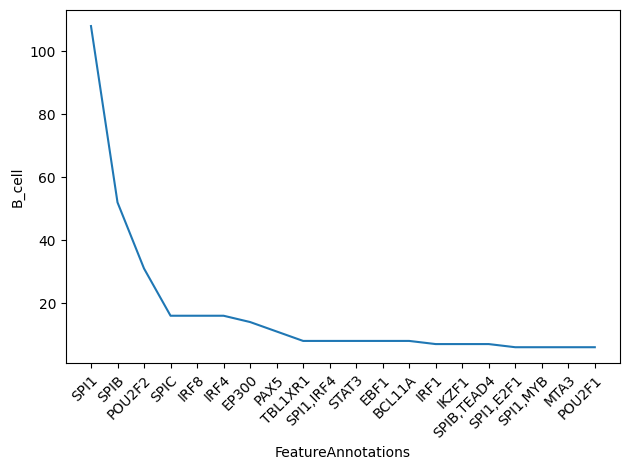

CD14+_monocyte


/tmp/ipykernel_1879297/656010102.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


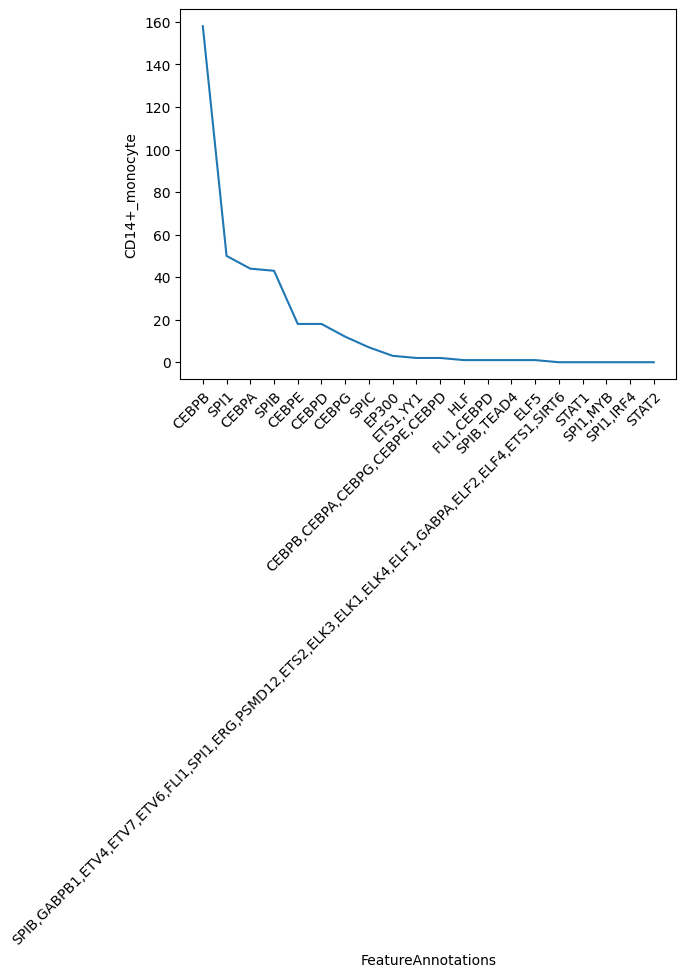

CD16+_monocyte


/tmp/ipykernel_1879297/656010102.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


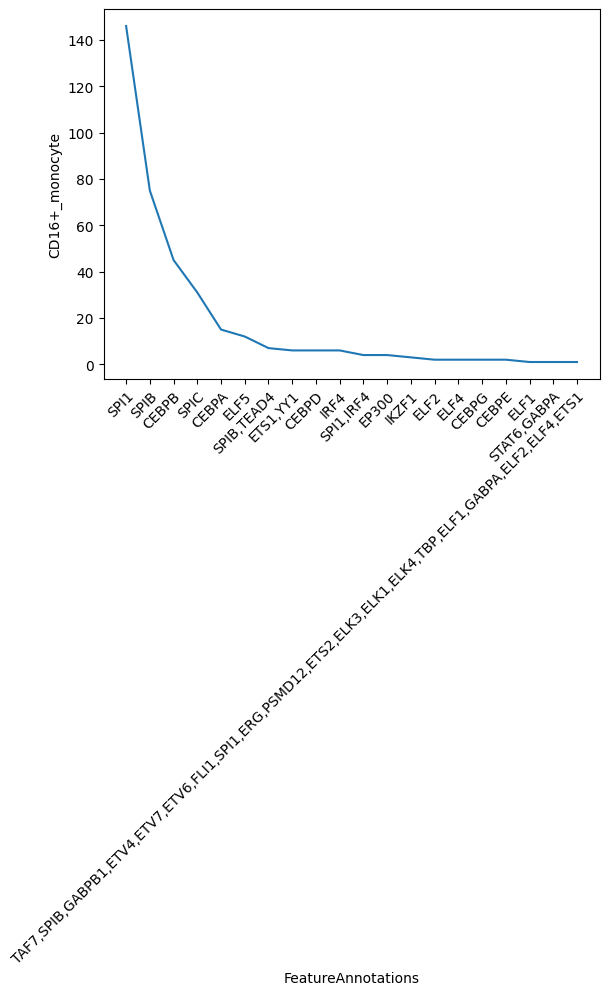

CD4+_T_cell


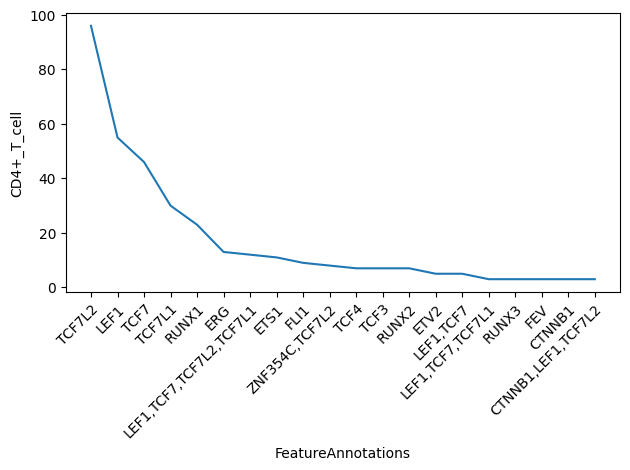

Cytotoxic_T_cell


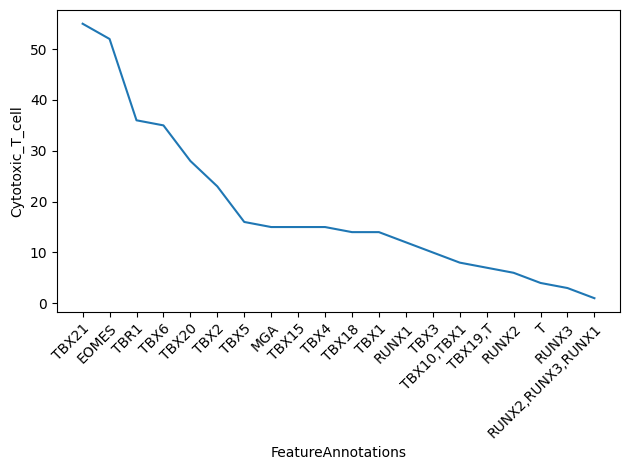

Dendritic_cell


/tmp/ipykernel_1879297/656010102.py:6: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


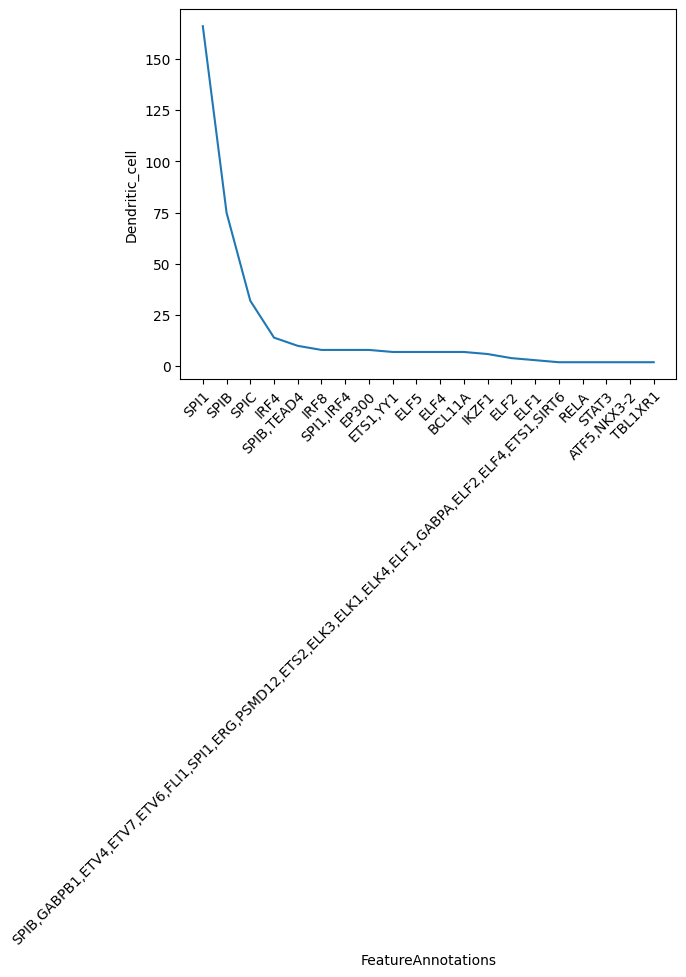

Natural_killer_cell


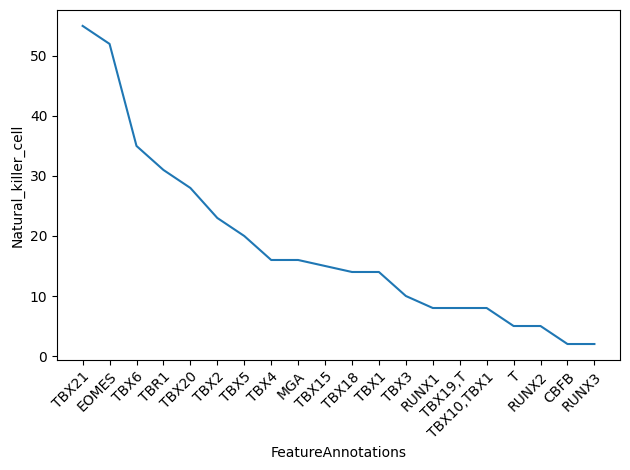

In [16]:
for cell_type in df_top50_counts.index:
    print(cell_type)
    df_sub = df_top50_counts.loc[cell_type].sort_values(ascending=False)
    g = sns.lineplot(data=df_sub[0:20])
    plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
    plt.tight_layout()
    plt.savefig(
        f"cistarget/plots_cell_type/{cell_type}__TOP50MOTIFS__top20motifsbyoccurrence.png",
        dpi=150,
        facecolor="white",
    )
    plt.show()
    plt.close()

# counts per occurrence of motif

In [17]:
df_counts = (
    df.groupby(["#GeneSignatureID", "FeatureAnnotations"]).size().unstack(fill_value=0)
)
df_counts.index = [
    x.split("__DARs")[0].replace("_celltypefair_1.FIXEDCELLS", "")
    for x in df_counts.index
]
df_counts

FeatureAnnotations,A1CF,ABCF2,ABL1,ACAA1,ACO1,ADARB1,AEBP2,AFF4,AGGF1,AHCTF1,...,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN4,ZSCAN5A,ZSCAN9,ZXDA,ZXDB,ZXDC,ZZZ3
10xmultiome__B_cell,1,0,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,2,2,1,0
10xmultiome__CD14+_monocyte,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
10xmultiome__CD16+_monocyte,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,2,0,1,1,0,0
10xmultiome__CD4+_T_cell,1,1,1,0,1,1,0,0,0,1,...,0,0,0,4,0,0,1,1,0,0
10xmultiome__Cytotoxic_T_cell,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,1,0,0
10xmultiome__Dendritic_cell,0,0,0,0,0,0,0,0,1,0,...,1,0,2,0,2,0,1,1,0,0
10xmultiome__Natural_killer_cell,0,0,0,0,0,0,0,1,0,0,...,1,0,0,2,0,0,1,1,1,0
10xv11__B_cell,1,0,0,0,0,0,0,0,1,0,...,0,1,0,2,0,0,2,2,1,0
10xv11__CD14+_monocyte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10xv11__CD16+_monocyte,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


for bed in df_counts.index:
    print(bed)
    fig, ax = plt.subplots(figsize=(10, 10))
    sample = bed.split("__")[0]
    df_sub = df_counts.loc[bed].sort_values(ascending=False)
    sns.lineplot(data=df_sub[0:20], ax=ax)
    plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
    plt.tight_layout()
    plt.savefig(
        f"cistarget/plots/{sample}__ALL__top20motifsbyoccurrence.png",
        dpi=150,
        facecolor="white",
    )
    plt.show()
    plt.close()

# # per cell type over all:


In [18]:
df_counts = df.groupby(["cell_type", "FeatureAnnotations"]).size().unstack(fill_value=0)
df_counts

FeatureAnnotations,A1CF,ABCF2,ABL1,ACAA1,ACO1,ADARB1,AEBP2,AFF4,AGGF1,AHCTF1,...,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN4,ZSCAN5A,ZSCAN9,ZXDA,ZXDB,ZXDC,ZZZ3
cell_type,,,,,,,,,,,,,,,,,,,,,
B_cell,7,0,4,0,2,0,1,1,3,1,...,1,5,1,9,0,0,15,13,7,0
CD14+_monocyte,0,0,0,1,0,0,1,0,0,0,...,1,1,1,1,0,1,0,0,0,0
CD16+_monocyte,0,0,0,3,0,0,0,0,0,0,...,2,0,3,0,4,0,1,1,0,0
CD4+_T_cell,3,2,6,0,7,6,0,3,0,4,...,1,2,0,32,1,0,6,6,0,6
Cytotoxic_T_cell,0,0,1,0,3,2,0,2,1,0,...,8,0,0,10,3,0,8,8,0,1
Dendritic_cell,0,0,0,0,1,1,0,0,4,0,...,1,2,3,0,3,0,2,2,0,0
Natural_killer_cell,0,0,0,2,3,2,0,2,0,0,...,10,0,0,15,3,0,8,8,1,1


for cell_type in df_counts.index:
    print(cell_type)
    df_sub = df_counts.loc[cell_type].sort_values(ascending=False)
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.lineplot(data=df_sub[0:20], ax=ax)
    plt.xticks(rotation=45, rotation_mode="anchor", ha="right")
    plt.tight_layout()
    plt.savefig(
        f"cistarget/plots_cell_type/{cell_type}__ALL__top20motifsbyoccurrence.png",
        dpi=150,
        facecolor="white",
    )
    plt.show()
    plt.close()

# Ridge plot for NES scores

only plot top 50, otherwise the distributions are indistinguishable 

In [19]:
df_top50

,#GeneSignatureID,Rank,FeatureID,FeatureDescription,FeatureAnnotations,FeatureDatabase,AUC,NES,CandidateTargetIDs,TopTargetIDs,TopTargetRanks,sample,cell_type,sample__cell_type,tech,rank_within_GeneSignatureID
0,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,1,tfdimers__MD00005,M01160_forward_3_M01705_reverse dimer: Kid3 / ...,"ZNF354C,TCF7L2",CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.030889,13.366193,chr2:230254572-230254921;chrX:46611710-4661206...,chr2:230254572-230254921;chrX:46611710-4661206...,53;130;168;204;206;254;369;426;496;561;567;575...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,1.0
1,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,2,hocomoco__TCF7_HUMAN.H11MO.0.A,TCF7_HUMAN,TCF7,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.029572,12.718803,chr20:32971711-32972051;chr2:108965579-1089659...,chr20:32971711-32972051;chr2:108965579-1089659...,164;189;247;315;320;333;342;379;447;479;512;55...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,2.0
2,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,3,hocomoco__TF7L1_HUMAN.H11MO.0.B,TF7L1_HUMAN,TCF7L1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.029100,12.486599,chrX:136630888-136631229;chr7:1824646-1824994;...,chrX:136630888-136631229;chr7:1824646-1824994;...,83;98;169;233;244;251;305;328;400;417;470;568;...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,3.0
3,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,4,hocomoco__TF7L1_MOUSE.H11MO.0.A,TF7L1_MOUSE,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.028541,12.212096,chr7:1824646-1824994;chr5:77379663-77380013;ch...,chr7:1824646-1824994;chr5:77379663-77380013;ch...,94;99;182;186;193;243;390;426;457;469;483;493;...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,4.0
4,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,5,hocomoco__TF7L2_HUMAN.H11MO.0.A,TF7L2_HUMAN,TCF7L2,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.028143,12.016626,chrX:123803467-123803810;chr16:68281683-682820...,chrX:123803467-123803810;chr16:68281683-682820...,191;201;220;245;310;333;384;418;435;441;465;55...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114410,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,46,dbcorrdb__CEBPB__ENCSR000EDA_1__m1,"CEBPB (ENCSR000EDA-1, motif 1)",CEBPB,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.018447,8.473611,chr2:216683893-216684241;chr1:156376167-156376...,chr2:216683893-216684241;chr1:156376167-156376...,42;327;493;506;542;627;645;775;897;946;1015;10...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,46.0
114411,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,47,cisbp__M4631,"SPI1[gene ID: ""ENSG00000066336"" species: ""Homo...",SPI1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.018429,8.463871,chr4:14400394-14400742;chr21:45532799-45533133...,chr4:14400394-14400742;chr21:45532799-45533133...,51;219;306;329;365;378;410;517;542;620;795;798...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,47.0
114412,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,48,transfac_pro__M04711,V$SPI1_07: PU.1,SPI1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.018396,8.445786,chr2:132384529-132384792;chr5:136012066-136012...,chr2:132384529-132384792;chr5:136012066-136012...,87;239;408;525;537;574;680;745;781;1043;1074;1...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,48.0
114413,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,49,transfac_pro__M01772,V$CEBPE_01: cebpe,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.018279,8.382507,chr4:69713668-69713925;chr11:69444525-69444873...,chr4:6971

In [20]:
order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]
# including subtechs
tech_alias_dict = {
    "10xmultiome": "10x MO",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (control)",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC",
    "mtscatacfacs": "mtscATAC",
    "s3atac": "s3-ATAC",
}
tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}
tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [21]:
df_top50["tech_alias"] = [tech_alias_dict[x] for x in df_top50["tech"]]

/tmp/ipykernel_1879297/2242581249.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top50["tech_alias"] = [tech_alias_dict[x] for x in df_top50["tech"]]


In [22]:
sns.set_context("notebook")
# sns.set_style("darkgrid")

Text(0.5, -80.67908537429402, '')

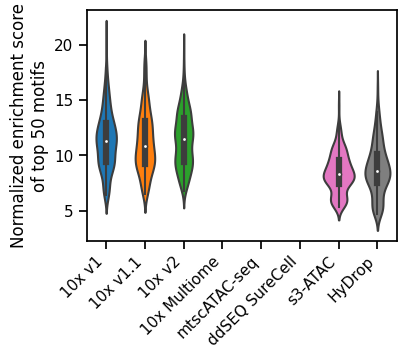

In [23]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.violinplot(
    data=df_top50,
    x="tech_alias",
    y="NES",
    order=tech_alias_order,
    ax=ax,
    cmap=tech_alias_color_palette,
    alpha=1,
    saturation=1,
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Normalized enrichment score\nof top 50 motifs")
plt.savefig("plots_pub/nes_violinplot.svg", dpi=600, facecolor="white")
plt.xlabel(None)

In [24]:
df_top50

,#GeneSignatureID,Rank,FeatureID,FeatureDescription,FeatureAnnotations,FeatureDatabase,AUC,NES,CandidateTargetIDs,TopTargetIDs,TopTargetRanks,sample,cell_type,sample__cell_type,tech,rank_within_GeneSignatureID,tech_alias
0,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,1,tfdimers__MD00005,M01160_forward_3_M01705_reverse dimer: Kid3 / ...,"ZNF354C,TCF7L2",CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.030889,13.366193,chr2:230254572-230254921;chrX:46611710-4661206...,chr2:230254572-230254921;chrX:46611710-4661206...,53;130;168;204;206;254;369;426;496;561;567;575...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,1.0,10x v1
1,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,2,hocomoco__TCF7_HUMAN.H11MO.0.A,TCF7_HUMAN,TCF7,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.029572,12.718803,chr20:32971711-32972051;chr2:108965579-1089659...,chr20:32971711-32972051;chr2:108965579-1089659...,164;189;247;315;320;333;342;379;447;479;512;55...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,2.0,10x v1
2,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,3,hocomoco__TF7L1_HUMAN.H11MO.0.B,TF7L1_HUMAN,TCF7L1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.029100,12.486599,chrX:136630888-136631229;chr7:1824646-1824994;...,chrX:136630888-136631229;chr7:1824646-1824994;...,83;98;169;233;244;251;305;328;400;417;470;568;...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,3.0,10x v1
3,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,4,hocomoco__TF7L1_MOUSE.H11MO.0.A,TF7L1_MOUSE,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.028541,12.212096,chr7:1824646-1824994;chr5:77379663-77380013;ch...,chr7:1824646-1824994;chr5:77379663-77380013;ch...,94;99;182;186;193;243;390;426;457;469;483;493;...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,4.0,10x v1
4,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,5,hocomoco__TF7L2_HUMAN.H11MO.0.A,TF7L2_HUMAN,TCF7L2,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.028143,12.016626,chrX:123803467-123803810;chr16:68281683-682820...,chrX:123803467-123803810;chr16:68281683-682820...,191;201;220;245;310;333;384;418;435;441;465;55...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,5.0,10x v1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114410,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,46,dbcorrdb__CEBPB__ENCSR000EDA_1__m1,"CEBPB (ENCSR000EDA-1, motif 1)",CEBPB,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.018447,8.473611,chr2:216683893-216684241;chr1:156376167-156376...,chr2:216683893-216684241;chr1:156376167-156376...,42;327;493;506;542;627;645;775;897;946;1015;10...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,46.0,10x v1.1
114411,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,47,cisbp__M4631,"SPI1[gene ID: ""ENSG00000066336"" species: ""Homo...",SPI1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.018429,8.463871,chr4:14400394-14400742;chr21:45532799-45533133...,chr4:14400394-14400742;chr21:45532799-45533133...,51;219;306;329;365;378;410;517;542;620;795;798...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,47.0,10x v1.1
114412,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,48,transfac_pro__M04711,V$SPI1_07: PU.1,SPI1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.018396,8.445786,chr2:132384529-132384792;chr5:136012066-136012...,chr2:132384529-132384792;chr5:136012066-136012...,87;239;408;525;537;574;680;745;781;1043;1074;1...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,48.0,10x v1.1
114413,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,49,transfac_pro__M01772,V$CEBPE_01: cebpe,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,

# Plot the "best" motifs, without prefiltering for common motifs

In [25]:
df

,#GeneSignatureID,Rank,FeatureID,FeatureDescription,FeatureAnnotations,FeatureDatabase,AUC,NES,CandidateTargetIDs,TopTargetIDs,TopTargetRanks,sample,cell_type,sample__cell_type,tech,rank_within_GeneSignatureID
0,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,1,tfdimers__MD00005,M01160_forward_3_M01705_reverse dimer: Kid3 / ...,"ZNF354C,TCF7L2",CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.030889,13.366193,chr2:230254572-230254921;chrX:46611710-4661206...,chr2:230254572-230254921;chrX:46611710-4661206...,53;130;168;204;206;254;369;426;496;561;567;575...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,1.0
1,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,2,hocomoco__TCF7_HUMAN.H11MO.0.A,TCF7_HUMAN,TCF7,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.029572,12.718803,chr20:32971711-32972051;chr2:108965579-1089659...,chr20:32971711-32972051;chr2:108965579-1089659...,164;189;247;315;320;333;342;379;447;479;512;55...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,2.0
2,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,3,hocomoco__TF7L1_HUMAN.H11MO.0.B,TF7L1_HUMAN,TCF7L1,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.029100,12.486599,chrX:136630888-136631229;chr7:1824646-1824994;...,chrX:136630888-136631229;chr7:1824646-1824994;...,83;98;169;233;244;251;305;328;400;417;470;568;...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,3.0
3,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,4,hocomoco__TF7L1_MOUSE.H11MO.0.A,TF7L1_MOUSE,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.028541,12.212096,chr7:1824646-1824994;chr5:77379663-77380013;ch...,chr7:1824646-1824994;chr5:77379663-77380013;ch...,94;99;182;186;193;243;390;426;457;469;483;493;...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,4.0
4,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell__...,5,hocomoco__TF7L2_HUMAN.H11MO.0.A,TF7L2_HUMAN,TCF7L2,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.028143,12.016626,chrX:123803467-123803810;chr16:68281683-682820...,chrX:123803467-123803810;chr16:68281683-682820...,191;201;220;245;310;333;384;418;435;441;465;55...,10xv1_celltypefair_1.FIXEDCELLS,CD4+_T_cell,10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell,10xv1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116272,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,1908,transfac_pro__M05729,V$ZNF776_01: ZNF776,ZNF776,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.004689,1.001357,chr18:615755-616072,chr18:615755-616072;chr21:31342400-31342733;ch...,36;589;1130;1879;2038;2166;2283;2709;2890;3987...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,1884.0
116273,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,1909,tiffin__TIFDMEM0000007,TIFDMEM0000007,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.004688,1.000956,chr10:79093747-79094088;chr17:34314368-3431470...,chr10:79093747-79094088;chr17:34314368-3431470...,338;450;488;492;1104;1679;1703;3806;4064;5336;...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,1885.0
116274,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,1910,transfac_pro__M09364,P$ANAC045_01: ANAC045,NaN,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.004688,1.000808,NaN,chr8:107632563-107632764;chr7:5692221-5692567;...,429;1303;1544;1576;2295;2628;2794;3038;3449;42...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte,10xv11,1886.0
116275,10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocy...,1911,transfac_pro__M08882,V$FKHL14_Q2: FKHL14,FOXC2,CTX_hg38_SCREEN3_1kb_bg_with_mask.regions_vs_m...,0.004687,1.000216,NaN,chr1:95227598-95227947;chr12:121547059-1215472...,964;1537;1717;2240;2258;2464;3753;4495;4537;49...,10xv11_celltypefair_1.FIXEDCELLS,CD16+_monocyte,10xv11_celltypefa

In [26]:
median_nes_df = pd.pivot_table(
    df,
    index="cell_type",
    columns="FeatureID",
    values="NES",
    aggfunc="median",
    dropna=False,
)

In [27]:
median_nes_df

FeatureID,bergman__Adf1,bergman__Aef1,bergman__Dip3,bergman__Eip74EF,bergman__Hr46,bergman__Rel,bergman__Su_H_,bergman__bab1,bergman__br-Z2,bergman__br-Z3,...,yetfasco__YPL248C_1510,yetfasco__YPL248C_2206,yetfasco__YPR008W_1425,yetfasco__YPR009W_2236,yetfasco__YPR013C_859,yetfasco__YPR022C_588,yetfasco__YPR052C_879,yetfasco__YPR086W_1327,yetfasco__YPR186C_1321,yetfasco__YPR199C_603
cell_type,,,,,,,,,,,,,,,,,,,,,
B_cell,1.088061,NaN,NaN,1.341578,NaN,2.231661,NaN,NaN,NaN,1.973387,...,1.105901,1.031392,1.873818,NaN,1.19579,1.279111,NaN,1.274154,NaN,1.580964
CD14+_monocyte,NaN,1.459033,NaN,2.445646,1.025001,1.316024,1.113877,NaN,1.133897,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CD16+_monocyte,NaN,NaN,1.401646,3.269471,NaN,1.365998,1.025647,NaN,NaN,NaN,...,NaN,NaN,NaN,1.326652,NaN,NaN,NaN,NaN,NaN,NaN
CD4+_T_cell,1.202290,1.050549,NaN,1.305332,NaN,1.340637,NaN,1.143187,NaN,1.186978,...,1.011079,NaN,NaN,NaN,NaN,1.230624,1.749992,NaN,NaN,NaN
Cytotoxic_T_cell,NaN,NaN,1.163615,NaN,NaN,1.277959,1.328752,NaN,NaN,NaN,...,NaN,NaN,1.026311,NaN,NaN,1.722367,1.589282,NaN,NaN,NaN
Dendritic_cell,NaN,NaN,NaN,2.942955,NaN,NaN,NaN,NaN,NaN,1.124282,...,NaN,NaN,2.228283,NaN,NaN,NaN,NaN,NaN,1.662850,NaN
Natural_killer_cell,NaN,NaN,1.092547,1.099093,NaN,1.554244,1.070143,NaN,NaN,NaN,...,1.180058,NaN,2.599794,NaN,NaN,1.385412,1.119085,NaN,1.114922,NaN


Create a translation df to determine the motif from the featureID:

In [28]:
translation_df = df.drop_duplicates(subset="FeatureID")[
    ["FeatureID", "FeatureAnnotations"]
].set_index(
    "FeatureID"
)  # .to_dict()

For each cell type, rank by median NES score and add annotation based on translation df, and drop the duplicates, keeping the highest NES score motif  
note that some annotation is Nan, this is replaced by a unique identifier to avoid dropping non-annotated motifs because they are "duplicated"

In [29]:
from IPython.display import Image
from IPython.core.display import HTML

In [30]:
top_n_toshow = 10
display_im = False
for cell_type in common_motifs.keys():
    print(cell_type)
    common_motifs_ranked_by_nes_df = pd.DataFrame(
        median_nes_df[list(common_motifs[cell_type])]
        .loc[cell_type]
        .sort_values(ascending=False)
    )
    common_motifs_ranked_by_nes_df["FeatureAnnotations"] = translation_df
    print(f"\t{len(common_motifs_ranked_by_nes_df)} common motifs")
    n_nan = common_motifs_ranked_by_nes_df.FeatureAnnotations.isna().sum()
    print(
        f"\t{n_nan} non-annotated motifs ({round(n_nan/len(common_motifs_ranked_by_nes_df)*100, 2)}%)"
    )
    nan_list = ["nan_" + str(x) for x in range(n_nan)]
    print("\treplacing non-annotated motifs by 'nan_x'")
    common_motifs_ranked_by_nes_df.loc[
        common_motifs_ranked_by_nes_df.FeatureAnnotations.isna(), "FeatureAnnotations"
    ] = nan_list

    print("\tdropping duplicates")
    common_motifs_ranked_by_nes_df = common_motifs_ranked_by_nes_df.drop_duplicates(
        subset="FeatureAnnotations", keep="first"
    )

    for motif in common_motifs_ranked_by_nes_df.index[:top_n_toshow]:
        nes = common_motifs_ranked_by_nes_df.loc[motif][cell_type]
        featureannotation = common_motifs_ranked_by_nes_df.loc[motif][
            "FeatureAnnotations"
        ]
        print(f"\t\t{featureannotation}\t{nes}\t{motif}")
        motif_url = f"https://motifcollections.aertslab.org/v9/logos/{motif}.png"
        if display_im == True:
            display(Image(url=motif_url))
            # print(motif_url)

NameError: name 'common_motifs' is not defined

In [ ]:
top_n_toshow = 30
display_im = True
for cell_type in common_motifs.keys():
    print(cell_type)
    common_motifs_ranked_by_nes_df = pd.DataFrame(
        median_nes_df[list(common_motifs[cell_type])]
        .loc[cell_type]
        .sort_values(ascending=False)
    )
    common_motifs_ranked_by_nes_df["FeatureAnnotations"] = translation_df
    print(f"\t{len(common_motifs_ranked_by_nes_df)} common motifs")
    n_nan = common_motifs_ranked_by_nes_df.FeatureAnnotations.isna().sum()
    print(
        f"\t{n_nan} non-annotated motifs ({round(n_nan/len(common_motifs_ranked_by_nes_df)*100, 2)}%)"
    )
    nan_list = ["nan_" + str(x) for x in range(n_nan)]
    print("\treplacing non-annotated motifs by 'nan_x'")
    common_motifs_ranked_by_nes_df.loc[
        common_motifs_ranked_by_nes_df.FeatureAnnotations.isna(), "FeatureAnnotations"
    ] = nan_list

    print("\tdropping duplicates")
    common_motifs_ranked_by_nes_df = common_motifs_ranked_by_nes_df.drop_duplicates(
        subset="FeatureAnnotations", keep="first"
    )

    for motif in common_motifs_ranked_by_nes_df.index[:top_n_toshow]:
        nes = common_motifs_ranked_by_nes_df.loc[motif][cell_type]
        featureannotation = common_motifs_ranked_by_nes_df.loc[motif][
            "FeatureAnnotations"
        ]
        print(f"\t\t{featureannotation}\t{nes}\t{motif}")
        motif_url = f"https://motifcollections.aertslab.org/v9/logos/{motif}.png"
        if display_im == True:
            display(Image(url=motif_url))
            # print(motif_url)

There are still lots of duplicates. Find top 5 non-duplicated motif families for each cell type:

```
B cell
		SPI1	16.15043126	cisbp__M4489
		BCL11A	4.35737634	hocomoco__BC11A_HUMAN.H11MO.0.A
		PAX2	4.271555072	taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY
		TCF4,TCF3,TCF12	3.881332277	cisbp__M5063
		
CD16+ monocyte
		SPIB	17.488259345000003	taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL
		
		
CD4+_T_cell
		TCF7	9.008507436999999	hocomoco__TCF7_HUMAN.H11MO.0.A
		ERG	5.334238255	taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth
		RUNX1	3.340262385	transfac_pro__M01658
		
Cytotoxic_T_cell
		TBX6	9.214962869	taipale_cyt_meth__TBX6_NAGGTGTGAN_eDBD
		nan_5	2.708837977	transfac_pro__M07916
		
Dendritic_cell
		SPIB	17.27872168	taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL
		STAT3	9.024961521000002	dbcorrdb__STAT3__ENCSR000DZV_1__m1
		
Natural_killer_cell
		EOMES	14.11191318	cisbp__M1632
```

In [ ]:
motifs_toplot_dict = {
    "B_cell": [
        "cisbp__M4489",
        "hocomoco__BC11A_HUMAN.H11MO.0.A",
        "taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY",
        "cisbp__M5063",
    ],
    "CD16+_monocyte": ["taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL"],
    "CD4+_T_cell": [
        "hocomoco__TCF7_HUMAN.H11MO.0.A",
        "taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth",
        "transfac_pro__M01658",
    ],
    "Cytotoxic_T_cell": [
        "taipale_cyt_meth__TBX6_NAGGTGTGAN_eDBD",
        "transfac_pro__M07916",
    ],
    "Dendritic_cell": [
        "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",
        "dbcorrdb__STAT3__ENCSR000DZV_1__m1",
    ],
    "Natural_killer_cell": ["cisbp__M1632"],
}

In [ ]:
nes_per_selectedmotif = pd.DataFrame()
for cell_type in motifs_toplot_dict.keys():
    print(cell_type)
    for motif in motifs_toplot_dict[cell_type]:
        print(motif)
        subset_df = df[(df["cell_type"] == cell_type)][df["FeatureID"] == motif]
        subset_df = subset_df.set_index("sample")
        subset_df_nes = pd.DataFrame(subset_df["NES"])
        subset_df_nes.columns = [motif]

        nes_per_selectedmotif = pd.concat(
            [nes_per_selectedmotif, subset_df_nes], axis=1
        )

In [ ]:
nes_per_selectedmotif

In [ ]:
order = [
    "CNA_10xmultiome_1.FIXEDCELLS",
    "CNA_10xmultiome_2.FIXEDCELLS",
    "SAN_10xmultiome_1.FIXEDCELLS",
    "SAN_10xmultiome_2.FIXEDCELLS",
    "VIB_10xmultiome_1.FIXEDCELLS",
    "VIB_10xmultiome_2.FIXEDCELLS",
    "VIB_10xv1_1.FIXEDCELLS",
    "VIB_10xv1_2.FIXEDCELLS",
    "CNA_10xv11_1.FIXEDCELLS",
    "CNA_10xv11_2.FIXEDCELLS",
    "CNA_10xv11_3.FIXEDCELLS",
    "CNA_10xv11c_1.FIXEDCELLS",
    "CNA_10xv11c_2.FIXEDCELLS",
    "STA_10xv11_1.FIXEDCELLS",
    "STA_10xv11_2.FIXEDCELLS",
    "TXG_10xv11_1.FIXEDCELLS",
    "CNA_10xv2_1.FIXEDCELLS",
    "CNA_10xv2_2.FIXEDCELLS",
    "TXG_10xv2_1.FIXEDCELLS",
    "TXG_10xv2_2.FIXEDCELLS",
    "VIB_10xv2_1.FIXEDCELLS",
    "VIB_10xv2_2.FIXEDCELLS",
    "BIO_ddseq_1.FIXEDCELLS",
    "BIO_ddseq_2.FIXEDCELLS",
    "BIO_ddseq_3.FIXEDCELLS",
    "BIO_ddseq_4.FIXEDCELLS",
    "HAR_ddseq_1.FIXEDCELLS",
    "HAR_ddseq_2.FIXEDCELLS",
    "UCS_ddseq_1.FIXEDCELLS",
    "UCS_ddseq_2.FIXEDCELLS",
    "CNA_hydrop_1.FIXEDCELLS",
    "CNA_hydrop_2.FIXEDCELLS",
    "CNA_hydrop_3.FIXEDCELLS",
    "EPF_hydrop_1.FIXEDCELLS",
    "EPF_hydrop_2.FIXEDCELLS",
    "EPF_hydrop_3.FIXEDCELLS",
    "EPF_hydrop_4.FIXEDCELLS",
    "VIB_hydrop_1.FIXEDCELLS",
    "VIB_hydrop_2.FIXEDCELLS",
    "BRO_mtscatacfacs_1.FIXEDCELLS",
    "BRO_mtscatacfacs_2.FIXEDCELLS",
    "CNA_mtscatac_1.FIXEDCELLS",
    "CNA_mtscatac_2.FIXEDCELLS",
    "MDC_mtscatac_1.FIXEDCELLS",
    "MDC_mtscatac_2.FIXEDCELLS",
    "OHS_s3atac_1.FIXEDCELLS",
    "OHS_s3atac_2.FIXEDCELLS",
]

In [ ]:
# nes_per_selectedmotif = nes_per_selectedmotif.loc[order]

In [ ]:
motif_alias_dict = {
    "cisbp__M4489": "B cell - SPI1",
    "hocomoco__BC11A_HUMAN.H11MO.0.A": "B cell - BCL11A",
    "taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY": "B cell - PAX2",
    "cisbp__M5063": "B cell - TCF4",
    "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL": "CD16+_monocyte - SPIB",
    "hocomoco__TCF7_HUMAN.H11MO.0.A": "CD4+_T_cell - TCF7",
    "taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth": "CD4+_T_cell - ERG",
    "transfac_pro__M01658": "CD4+_T_cell - RUNX",
    "taipale_cyt_meth__TBX6_NAGGTGTGAN_eDBD": "Cytotoxic_T_cell - TBX6",
    "transfac_pro__M07916": "Cytotoxic_T_cell - ?",
    "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL": "Dendritic_cell - SPIB",
    "dbcorrdb__STAT3__ENCSR000DZV_1__m1": "Dendritic_cell - STAT3",
    "cisbp__M1632": "Natural_killer_cell - EOMES",
}

In [ ]:
nes_per_selectedmotif = nes_per_selectedmotif.rename(columns=motif_alias_dict)

In [ ]:
nes_per_selectedmotif = nes_per_selectedmotif.round(1)

In [ ]:
nes_per_selectedmotif_normalized = nes_per_selectedmotif.transform(
    lambda x: minmax_scale(x.astype(float))
)

In [ ]:
nes_per_selectedmotif_normalized

In [ ]:
n_rows = len(nes_per_selectedmotif_normalized)
n_cols = len(nes_per_selectedmotif_normalized.columns)

In [ ]:
f, ax = plt.subplots(figsize=(n_cols * 2, n_rows * 2))
sns.heatmap(nes_per_selectedmotif_normalized, ax=ax, square=True, cmap="viridis")
sns.heatmap(
    nes_per_selectedmotif,
    annot=True,
    ax=ax,
    fmt="g",
    square=True,
    cmap=None,
    cbar=False,
    alpha=0,
)
plt.tight_layout()
# plt.savefig("plots_pub/DAR_count_bysample.png", dpi=300, facecolor="white")

In [ ]:
# bytech

In [ ]:
# n_dars_df = dar_path_df.pivot_table(
#     index="tech", columns="cell_type", values="n_dars", aggfunc="mean"
# )

In [ ]:
from sklearn.preprocessing import minmax_scale

In [ ]:
# n_dars_df_normalized = n_dars_df.transform(lambda x: minmax_scale(x.astype(float)))

In [ ]:
# n_rows = len(n_dars_df)
# n_cols = len(n_dars_df.columns)

# f, ax = plt.subplots(figsize=(n_cols * 1.25, n_rows * 1.25))
# sns.heatmap(n_dars_df_normalized, ax=ax, square=True, cmap="viridis")
# sns.heatmap(
#     n_dars_df, annot=True, ax=ax, fmt="g", square=True, cmap=None, cbar=False, alpha=0
# )
# plt.tight_layout()
# # plt.savefig("plots_pub/DAR_count_mean_bytech.png", dpi=300, facecolor="white")

# repeat the above, but now for common motif only

In [31]:
split_df = pd.DataFrame(df.groupby(["cell_type", "sample"])["FeatureID"].unique())

In [32]:
split_df

FeatureID
cell_type           sample                                                                                  
B_cell              10xmultiome_celltypefair_1.FIXEDCELLS  [hocomoco__IRF4_HUMAN.H11MO.0.A, hocomoco__IRF...
                    10xv11_celltypefair_1.FIXEDCELLS       [hocomoco__IRF4_HUMAN.H11MO.0.A, cisbp__M4489,...
                    10xv1_celltypefair_1.FIXEDCELLS        [cisbp__M4489, factorbook__PU1, hocomoco__IRF4...
                    10xv2_celltypefair_1.FIXEDCELLS        [factorbook__PU1, cisbp__M4489, hocomoco__IRF4...
                    ddseq_celltypefair_1.FIXEDCELLS        [hocomoco__IRF4_HUMAN.H11MO.0.A, hocomoco__IRF...
                    hydrop_celltypefair_1.FIXEDCELLS       [hocomoco__IRF4_HUMAN.H11MO.0.A, factorbook__P...
                    mtscatac_celltypefair_1.FIXEDCELLS     [hocomoco__IRF4_HUMAN.H11MO.0.A, hocomoco__IRF...
                    s3atac_celltypefair_1.FIXEDCELLS       [hocomoco__IRF4_HUMAN.H11MO.0.A, taipale__SPI1...
CD14+_monocyte      10xmultiome_celltypefair_1.FIXEDCELLS  [taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL, hoco...
                    10xv11_celltypefair_1.FIXEDCELLS       [taipale_cyt_meth__SPIB_RAWWGRGGAAGTN_FL_meth,...
                    10xv1_celltypefair_1.FIXEDCELLS        [cisbp__M0315, transfac_pro__M01772, dbcorrdb_...
                    10xv2_celltypefair_1.FIXEDCELLS        [cisbp__M1925, hocomoco__CEBPA_MOUSE.H11MO.0.A...
                    ddseq_celltypefair_1.FIXEDCELLS        [taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL, cisb...
                    hydrop_celltypefair_1.FIXEDCELLS       [taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL, cisb...
                    mtscatac_celltypefair_1.FIXEDCELLS     [dbcorrdb__CEBPB__ENCSR000EDA_1__m1, hocomoco_...
                    s3atac_celltypefair_1.FIXEDCELLS       [taipale_cyt_meth__SPIB_RAWWGRGGAAGTN_FL_meth,...
CD16+_monocyte      10xmultiome_celltypefair_1.FIXEDCELLS  [taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL, cisb...
                    10xv11_celltypefair_1.FIXEDCELLS       [taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL, cisb...
                    10xv1_celltypefair_1.FIXEDCELLS        [taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL, taip...
                    10xv2_celltypefair_1.FIXEDCELLS        [taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL, cisb...
                    ddseq_celltypefair_1.FIXEDCELLS        [taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL, cisb...
                    hydrop_celltypefair_1.FIXEDCELLS       [taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL, taip...
                    mtscatac_celltypefair_1.FIXEDCELLS     [taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL, taip...
                    s3atac_celltypefair_1.FIXEDCELLS       [taipale_cyt_meth__SPIB_RAWWGRGGAAGTN_FL_meth,...
CD4+_T_cell         10xmultiome_celltypefair_1.FIXEDCELLS  [tfdimers__MD00005, hocomoco__TCF7_HUMAN.H11MO...
                    10xv11_celltypefair_1.FIXEDCELLS       [tfdimers__MD00005, hocomoco__TF7L1_HUMAN.H11M...
                    10xv1_celltypefair_1.FIXEDCELLS        [tfdimers__MD00005, hocomoco__TCF7_HUMAN.H11MO...
                    10xv2_celltypefair_1.FIXEDCELLS        [hocomoco__TF7L1_HUMAN.H11MO.0.B, hocomoco__TF...
                    ddseq_celltypefair_1.FIXEDCELLS        [tfdimers__MD00005, homer__ACAGGATGTGGT_ETS_RU...
                    hydrop_celltypefair_1.FIXEDCELLS       [hocomoco__TCF7_HUMAN.H11MO.0.A, homer__ACAGGA...
                    mtscatac_celltypefair_1.FIXEDCELLS     [hocomoco__TF7L1_HUMAN.H11MO.0.B, hocomoco__TF...
                    s3atac_celltypefair_1.FIXEDCELLS       [homer__ACAGGATGTGGT_ETS_RUNX, neph__UW.Motif....
Cytotoxic_T_cell    10xmultiome_celltypefair_1.FIXEDCELLS  [cisbp__M5895, cisbp__M1631, taipale__TBX2_ful...
                    10xv11_celltypefair_1.FIXEDCELLS       [cisbp__M5895, taipale__TBX2_full_NAGGTGTGAWN,...
                    10xv1_celltypefair_1.FIXEDCELLS        [taipale__TBX2_full_NAGGTGTGAWN, cisbp__M5895,...
                    10xv2_celltypefair_1.FIXEDCELLS        [cisbp_

In [33]:
list(split_df.loc["B_cell"].index)

['10xmultiome_celltypefair_1.FIXEDCELLS',
 '10xv11_celltypefair_1.FIXEDCELLS',
 '10xv1_celltypefair_1.FIXEDCELLS',
 '10xv2_celltypefair_1.FIXEDCELLS',
 'ddseq_celltypefair_1.FIXEDCELLS',
 'hydrop_celltypefair_1.FIXEDCELLS',
 'mtscatac_celltypefair_1.FIXEDCELLS',
 's3atac_celltypefair_1.FIXEDCELLS']

In [34]:
good_samples = [
    "10xmultiome_celltypefair_1.FIXEDCELLS",
    "10xv11_celltypefair_1.FIXEDCELLS",
    "10xv1_celltypefair_1.FIXEDCELLS",
    "10xv2_celltypefair_1.FIXEDCELLS",
    "ddseq_celltypefair_1.FIXEDCELLS",
    "hydrop_celltypefair_1.FIXEDCELLS",
    "mtscatac_celltypefair_1.FIXEDCELLS",
    "s3atac_celltypefair_1.FIXEDCELLS",
]

In [35]:
split_df.index.get_level_values(0).unique()

Index(['B_cell', 'CD14+_monocyte', 'CD16+_monocyte', 'CD4+_T_cell',
       'Cytotoxic_T_cell', 'Dendritic_cell', 'Natural_killer_cell'],
      dtype='object', name='cell_type')

In [36]:
common_motifs = {}
for cell_type in split_df.index.get_level_values(0).unique():
    set_list = []
    # for sample in split_df.loc['B_cell']:
    print(cell_type)
    for sample in good_samples:
        # print(sample)
        if sample in split_df.loc[cell_type].index:
            motifs_set = set(split_df.loc[cell_type].loc[sample]["FeatureID"])
            set_list.append(motifs_set)
        else:
            print(f"\t{sample} not in index for {cell_type}")

    intersection = set.intersection(*set_list)
    # print(set.intersection(*set_list))
    print(len(intersection))
    common_motifs[cell_type] = set.intersection(*set_list)

B_cell
776
CD14+_monocyte
824
CD16+_monocyte
673
CD4+_T_cell
617
Cytotoxic_T_cell
503
Dendritic_cell
465
Natural_killer_cell
458


### Now, for each cell type, determine which motifs have the highest NES scores:
subset the df by common motifs only

In [37]:
df_common_motifs_only = pd.DataFrame()
for cell_type in common_motifs.keys():
    print(cell_type)
    df_subset = df[df.cell_type == cell_type]
    df_subset = df_subset[df_subset.FeatureID.isin(common_motifs[cell_type])]
    df_common_motifs_only = pd.concat([df_common_motifs_only, df_subset])

B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell


In [38]:
median_nes_df = pd.pivot_table(
    df_common_motifs_only,
    index="cell_type",
    columns="FeatureID",
    values="NES",
    aggfunc="median",
    dropna=False,
)

In [39]:
median_nes_df

FeatureID,bergman__Eip74EF,bergman__Rel,bergman__byn,bergman__dif_Rel,bergman__esg,bergman__pan,bergman__shn-ZFP2,bergman__slbo,c2h2_zfs__M0400,c2h2_zfs__M0404,...,yetfasco__YIL056W_2091,yetfasco__YKL062W_518,yetfasco__YMR016C_404,yetfasco__YOL028C_1737,yetfasco__YOR028C_409,yetfasco__YPL038W_1370,yetfasco__YPL075W_2071,yetfasco__YPL089C_419,yetfasco__YPL202C_389,yetfasco__YPR022C_588
cell_type,,,,,,,,,,,,,,,,,,,,,
B_cell,NaN,2.231661,NaN,1.775383,3.753078,NaN,2.414177,NaN,1.564611,NaN,...,NaN,2.525862,NaN,NaN,NaN,NaN,NaN,1.845693,NaN,NaN
CD14+_monocyte,2.445646,NaN,NaN,NaN,NaN,NaN,NaN,2.936721,NaN,NaN,...,2.870576,NaN,NaN,2.552817,2.208493,NaN,2.400974,NaN,NaN,NaN
CD16+_monocyte,3.269471,NaN,NaN,NaN,NaN,NaN,NaN,1.873056,NaN,NaN,...,1.655020,NaN,NaN,NaN,NaN,NaN,3.714806,NaN,NaN,NaN
CD4+_T_cell,NaN,NaN,NaN,NaN,NaN,3.902325,NaN,NaN,NaN,2.209166,...,NaN,NaN,1.590134,NaN,NaN,NaN,NaN,NaN,2.203892,NaN
Cytotoxic_T_cell,NaN,NaN,3.507035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.803279,NaN,NaN,2.308049,1.722367
Dendritic_cell,2.942955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.812267,NaN,NaN,NaN
Natural_killer_cell,NaN,NaN,3.423201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.197438,NaN,NaN,2.230294,1.385412


Create a translation df to determine the motif from the featureID:

In [40]:
translation_df = df.drop_duplicates(subset="FeatureID")[
    ["FeatureID", "FeatureAnnotations"]
].set_index(
    "FeatureID"
)  # .to_dict()

For each cell type, rank by median NES score and add annotation based on translation df, and drop the duplicates, keeping the highest NES score motif  
note that some annotation is Nan, this is replaced by a unique identifier to avoid dropping non-annotated motifs because they are "duplicated"

In [41]:
from IPython.display import Image
from IPython.core.display import HTML

In [42]:
median_nes_df

FeatureID,bergman__Eip74EF,bergman__Rel,bergman__byn,bergman__dif_Rel,bergman__esg,bergman__pan,bergman__shn-ZFP2,bergman__slbo,c2h2_zfs__M0400,c2h2_zfs__M0404,...,yetfasco__YIL056W_2091,yetfasco__YKL062W_518,yetfasco__YMR016C_404,yetfasco__YOL028C_1737,yetfasco__YOR028C_409,yetfasco__YPL038W_1370,yetfasco__YPL075W_2071,yetfasco__YPL089C_419,yetfasco__YPL202C_389,yetfasco__YPR022C_588
cell_type,,,,,,,,,,,,,,,,,,,,,
B_cell,NaN,2.231661,NaN,1.775383,3.753078,NaN,2.414177,NaN,1.564611,NaN,...,NaN,2.525862,NaN,NaN,NaN,NaN,NaN,1.845693,NaN,NaN
CD14+_monocyte,2.445646,NaN,NaN,NaN,NaN,NaN,NaN,2.936721,NaN,NaN,...,2.870576,NaN,NaN,2.552817,2.208493,NaN,2.400974,NaN,NaN,NaN
CD16+_monocyte,3.269471,NaN,NaN,NaN,NaN,NaN,NaN,1.873056,NaN,NaN,...,1.655020,NaN,NaN,NaN,NaN,NaN,3.714806,NaN,NaN,NaN
CD4+_T_cell,NaN,NaN,NaN,NaN,NaN,3.902325,NaN,NaN,NaN,2.209166,...,NaN,NaN,1.590134,NaN,NaN,NaN,NaN,NaN,2.203892,NaN
Cytotoxic_T_cell,NaN,NaN,3.507035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.803279,NaN,NaN,2.308049,1.722367
Dendritic_cell,2.942955,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.812267,NaN,NaN,NaN
Natural_killer_cell,NaN,NaN,3.423201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.197438,NaN,NaN,2.230294,1.385412


In [43]:
top_n_toshow = 30
display_im = True
for cell_type in common_motifs.keys():
    print(cell_type)
    common_motifs_ranked_by_nes_df = pd.DataFrame(
        median_nes_df[list(common_motifs[cell_type])]
        .loc[cell_type]
        .sort_values(ascending=False)
    )
    common_motifs_ranked_by_nes_df["FeatureAnnotations"] = translation_df
    print(f"\t{len(common_motifs_ranked_by_nes_df)} common motifs")
    n_nan = common_motifs_ranked_by_nes_df.FeatureAnnotations.isna().sum()
    print(
        f"\t{n_nan} non-annotated motifs ({round(n_nan/len(common_motifs_ranked_by_nes_df)*100, 2)}%)"
    )
    nan_list = ["nan_" + str(x) for x in range(n_nan)]
    print("\treplacing non-annotated motifs by 'nan_x'")
    common_motifs_ranked_by_nes_df.loc[
        common_motifs_ranked_by_nes_df.FeatureAnnotations.isna(), "FeatureAnnotations"
    ] = nan_list

    print("\tdropping duplicates")
    common_motifs_ranked_by_nes_df = common_motifs_ranked_by_nes_df.drop_duplicates(
        subset="FeatureAnnotations", keep="first"
    )

    for motif in common_motifs_ranked_by_nes_df.index[:top_n_toshow]:
        nes = common_motifs_ranked_by_nes_df.loc[motif][cell_type]
        featureannotation = common_motifs_ranked_by_nes_df.loc[motif][
            "FeatureAnnotations"
        ]
        print(f"\t\t{featureannotation}\t{nes}\t{motif}")
        motif_url = f"https://motifcollections.aertslab.org/v9/logos/{motif}.png"
        if display_im == True:
            display(Image(url=motif_url))
            # print(motif_url)

B_cell
	776 common motifs
	62 non-annotated motifs (7.99%)
	replacing non-annotated motifs by 'nan_x'
	dropping duplicates
		IRF4	17.335101525	hocomoco__IRF4_HUMAN.H11MO.0.A


		SPI1	15.988768319999998	cisbp__M4489


		SPI1,IRF4	15.575807195	factorbook__PU1


		IRF8	15.441262135	hocomoco__IRF8_HUMAN.H11MO.0.B


		SPIB	12.48207646	hocomoco__SPIB_MOUSE.H11MO.0.A


		EP300	11.70357357	dbcorrdb__EP300__ENCSR000DZG_1__m1


		nan_0	10.819687665	cisbp__M5864


		BCL11A	9.961608692999999	cisbp__M4453


		TBL1XR1	9.597227667	dbcorrdb__TBL1XR1__ENCSR000DYZ_1__m1


		STAT3	9.4623904575	dbcorrdb__STAT3__ENCSR000DZV_1__m1


		SPIC	9.430142027	taipale__Spic_DBD_AAAAAGMGGAAGTA


		SPIB,TEAD4	8.028366743500001	taipale_tf_pairs__TEAD4_SPIB_RGAATGCGGAAGTN_CAP_1


		IKZF1	7.6472839715	dbcorrdb__IKZF1__ENCSR000EUJ_1__m1


		SPI1,E2F1	7.1757687175000004	tfdimers__MD00015


		PAX5	7.1686886915	dbcorrdb__PAX5__ENCSR000BHJ_1__m2


		MTA3	7.085963463500001	dbcorrdb__MTA3__ENCSR000BRH_1__m1


		POU2F1	6.988649981	transfac_pro__M00342


		SPI1,MYB	6.9341098164999995	tfdimers__MD00466


		POU2F2	6.920402279	cisbp__M4486


		POU5F1B,POU5F1	6.364010344	homer__ATTTGCATAA_Oct4


		STAT1	6.3302000465	dbcorrdb__STAT1__ENCSR000FAU_1__m1


		ETS1,YY1	6.3240567925	tfdimers__MD00012


		ATF5,NKX3-2	6.1841636975	tfdimers__MD00581


		EBF1	6.065534255	hocomoco__COE1_MOUSE.H11MO.0.A


		LTF,E2F1	6.020292871500001	tfdimers__MD00064


		POU2F2,POU2F3,POU2F1	5.9670219495	flyfactorsurvey__pdm2_SOLEXA_5_FBgn0004394


		IRF1,MYB	5.873208012	tfdimers__MD00026


		IRF1	5.778536472	dbcorrdb__IRF1__ENCSR000EGL_1__m1


		nan_1	5.7533620055	elemento__ATTTGCATA


		PAX8	5.704600575000001	taipale_cyt_meth__PAX8_NSGTCACGCWTSANYGNNYN_FL


CD14+_monocyte
	824 common motifs
	95 non-annotated motifs (11.53%)
	replacing non-annotated motifs by 'nan_x'
	dropping duplicates
		CEBPA	11.56682057	hocomoco__CEBPA_MOUSE.H11MO.0.A


		CEBPB	11.52017865	cisbp__M6170


		SPIB	11.154333235	taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL


		nan_0	10.691282335	transfac_pro__M07414


		nan_1	10.571627755	transfac_pro__M01772


		SPI1	9.951257081	transfac_pro__M01203


		nan_2	9.4271425005	cisbp__M6485


		CEBPE	9.2399132265	cisbp__M5317


		CEBPD	8.9859991355	cisbp__M6171


		nan_3	8.1903080025	cisbp__M5864


		nan_4	7.6426153485	transfac_pro__M07689


		CEBPG	7.635132763	taipale_cyt_meth__CEBPG_NRTTGCGYAAYN_eDBD_meth


		EP300	7.614725577	transfac_pro__M04749


		nan_5	7.570823858000001	cisbp__M0326


		CEBPB,CEBPA,CEBPG,CEBPE,CEBPD	7.091106842	transfac_pro__M00912


		SPIC	7.079107648	cisbp__M6096


		NFIL3	6.9135635115	hocomoco__NFIL3_HUMAN.H11MO.0.D


		ELF5	6.752205926	taipale_cyt_meth__ELF5_NANNAGGAAGTN_eDBD_meth


		SPIB,TEAD4	6.743737505	taipale_tf_pairs__TEAD4_SPIB_RGAATGCGGAAGTN_CAP_1


		nan_6	6.598810794	flyfactorsurvey__Xrp1_CG6272_SANGER_5_FBgn0036126


		nan_7	6.5372660945	predrem__nrMotif551


		ETS1,YY1	6.480626652	tfdimers__MD00012


		DBP	6.313296387499999	cisbp__M6186


		HLF	6.260316659000001	hocomoco__HLF_MOUSE.H11MO.0.C


		nan_8	6.259149088	flyfactorsurvey__slbo_SANGER_5_FBgn0005638


		FLI1,CEBPD	6.220536066999999	taipale_tf_pairs__FLI1_CEBPD_RNCGGANNTTGCGCAAN_CAP


		nan_9	6.196498316	elemento__ACTTCCTC


		CEBPB,FLI1	6.1698315865	taipale_tf_pairs__FLI1_CEBPB_RNCGGANNTTGCGCAAN_CAP


		ELF3	6.116772689499999	hocomoco__ELF3_HUMAN.H11MO.0.A


		ERF,CEBPD	6.1145626150000005	taipale_tf_pairs__ERF_CEBPD_RSMGGAANTTGCGYAAN_CAP


CD16+_monocyte
	673 common motifs
	74 non-annotated motifs (11.0%)
	replacing non-annotated motifs by 'nan_x'
	dropping duplicates
		SPIB	16.409382645	taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL


		nan_0	13.91681595	cisbp__M6485


		SPI1	12.191132580000001	transfac_pro__M01203


		nan_1	11.699318645	cisbp__M5864


		SPIC	10.235571165	cisbp__M5865


		ELF5	8.8367061065	taipale_cyt_meth__ELF5_NANNAGGAAGTN_eDBD_meth


		ETS1,YY1	8.7735794995	tfdimers__MD00012


		SPIB,TEAD4	8.470804723	taipale_tf_pairs__TEAD4_SPIB_RGAATGCGGAAGTN_CAP_1


		SPI1,IRF4	8.4629602865	factorbook__PU1


		IRF4	8.2182978325	hocomoco__IRF4_HUMAN.H11MO.0.A


		EP300	7.900618133	dbcorrdb__EP300__ENCSR000DZG_1__m1


		ELF1	7.8085122405	transfac_pro__M00746


		CEBPB	7.718887023000001	dbcorrdb__CEBPB__ENCSR000EDA_1__m1


		ELF4	7.597573592	taipale_cyt_meth__ELF4_NATGCGGAAGTN_eDBD_meth


		nan_2	7.5429349514999995	elemento__ACTTCCTC


		ELF2	7.369232394000001	taipale_cyt_meth__ELF2_NATGCGGAAGTN_eDBD_meth


		nan_3	7.334189099	transfac_pro__M07414


		ELF3	7.2963518955	hocomoco__ELF3_HUMAN.H11MO.0.A


		nan_4	7.2953189105	predrem__nrMotif551


		IRF8	7.1740096435	hocomoco__IRF8_HUMAN.H11MO.0.B


		IKZF1	7.011972118499999	dbcorrdb__IKZF1__ENCSR000EUJ_1__m1


		BCL11A	7.001299458	cisbp__M4453


		CEBPA	6.760805023	hocomoco__CEBPA_HUMAN.H11MO.0.A


		nan_5	6.756819403	transfac_pro__M01772


		GABPA,NKX2-1	6.6486867295	tfdimers__MD00204


		CEBPE	6.618843789	cisbp__M5317


		PAX4,GABPA	6.586417429000001	tfdimers__MD00097


		nan_6	6.456041390499999	flyfactorsurvey__CG32830_SANGER_10_FBgn0052830


		TAF7,SPIB,GABPB1,ETV4,ETV7,ETV6,FLI1,SPI1,ERG,PSMD12,ETS2,ELK3,ELK1,ELK4,TBP,ELF1,GABPA,ELF2,ELF4,ETS1	6.4107555650000005	tfdimers__MD00018


		nan_7	6.3908431935	cisbp__M4847


CD4+_T_cell
	617 common motifs
	74 non-annotated motifs (11.99%)
	replacing non-annotated motifs by 'nan_x'
	dropping duplicates
		ZNF354C,TCF7L2	12.589424685000001	tfdimers__MD00005


		TCF7L1	12.501504695	hocomoco__TF7L1_HUMAN.H11MO.0.B


		nan_0	12.048306705000002	hocomoco__TF7L1_MOUSE.H11MO.0.A


		TCF7	11.59664617	hocomoco__TCF7_HUMAN.H11MO.0.A


		TCF7L2	11.425474574999999	hocomoco__TF7L2_HUMAN.H11MO.0.A


		LEF1	10.12243293	cisbp__M1587


		TCF4	9.980594417999999	homer__ACATCAAAGGGA_Tcf4


		TCF3	9.075328266	homer__ACATCAAAGG_Tcf3


		nan_1	7.751425612	neph__UW.Motif.0008


		RUNX1	7.0647252645	homer__ACAGGATGTGGT_ETS_RUNX


		LEF1,TCF7	6.6827740984999995	transfac_pro__M00978


		LEF1,TCF7,TCF7L2,TCF7L1	6.621241406499999	swissregulon__hs__LEF1_TCF7_TCF7L1_2.p2


		CTNNB1,LEF1,TCF7L2	6.141695262500001	transfac_pro__M04633


		LEF1,TCF7,TCF7L1	6.0580896630000005	transfac_pro__M08902


		CTNNB1	5.8033076315	transfac_pro__M07599


		ERG	5.782557731500001	taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth


		ETV2	5.759292102	taipale_cyt_meth__ETV2_NRCAGGAAGTN_eDBD_meth_repr


		FLI1	5.619403409	homer__AACAGGAAAT_EWS_FLI1-fusion


		ETS1	5.33359179	transfac_pro__M07211


		nan_2	5.2783919645	transfac_pro__M01286


		ETS1,ZNF354C	5.1879015385	tfdimers__MD00009


		FOXO1,FLI1	5.1771191835	taipale_tf_pairs__FOXO1_FLI1_RTMAACAGGAAGTN_CAP


		FEV	5.1618229385	taipale_cyt_meth__FEV_NACMGGAAGTN_eDBD_meth


		FOXI1,FLI1	5.0705719735	taipale_tf_pairs__FLI1_FOXI1_RTAAACMGGAARYN_CAP


		ELF1,FOXO1	5.00078511	taipale_tf_pairs__FOXO1_ELF1_RWMAACAGGAAGTN_CAP_repr


		ERF,FOXO1	4.924788063499999	taipale_tf_pairs__ERF_FOXO1_RTMAACAGGAARNN_CAP


		NFIC	4.9115606839999995	dbcorrdb__NFIC__ENCSR000BRN_1__m2


		nan_3	4.8607879525	predrem__nrMotif1624


		BOLL	4.779085514	hdpi__BOLL


		RUNX3,HOXA13	4.777606881500001	tfdimers__MD00231


Cytotoxic_T_cell
	503 common motifs
	126 non-annotated motifs (25.05%)
	replacing non-annotated motifs by 'nan_x'
	dropping duplicates
		TBX2	15.502912985	cisbp__M5895


		TBX20	15.022204765	cisbp__M1631


		nan_0	14.981558705000001	cisbp__M1635


		nan_1	14.885117104999999	cisbp__M1622


		EOMES	14.831446085	cisbp__M1632


		TBX6	13.931523705	transfac_pro__M07899


		TBX18	13.558366985	taipale_cyt_meth__TBX18_NRAGGTGTGAAN_eDBD_meth


		TBX15	13.53076309	taipale_cyt_meth__TBX15_NAGGTGTGAN_eDBD_meth


		TBR1	13.107410705	cisbp__M5873


		TBX21	13.014420395	homer__AGGTGTGAAM_Tbet


		TBX10,TBX1	12.81272486	transfac_pro__M07901


		TBX19,T	12.213809715	transfac_pro__M07894


		TBX3	11.97717339	taipale_cyt_meth__TBX3_NAGGTGTGAN_eDBD_meth


		TBX4	11.84801265	cisbp__M5896


		MGA	11.737093900000001	cisbp__M5628


		nan_2	11.6557624	cisbp__M1624


		TBX1	11.590486895	cisbp__M1628


		nan_3	11.331449119999998	cisbp__M1634


		TBX5	10.998529565	cisbp__M1629


		T	10.62128145	hocomoco__BRAC_HUMAN.H11MO.1.B


		nan_4	9.5047873445	cisbp__M1623


		RUNX2	8.8210064005	transfac_pro__M07276


		RUNX1	8.791405236500001	factorbook__RUNX1


		RUNX2,RUNX3,RUNX1	8.005795119	transfac_pro__M08866


		CBFB	7.639315133	transfac_pro__M03841


		RUNX3	7.5173929595	hocomoco__RUNX3_MOUSE.H11MO.0.A


		nan_5	7.4331198045	cisbp__M1640


		TBX22	6.961708698	transfac_pro__M05496


		TBL1XR1	6.6530501015	dbcorrdb__TBL1XR1__ENCSR000DYZ_1__m2


		RUNX2,RUNX3,CBFB,RUNX1	6.642238472	transfac_pro__M00769


Dendritic_cell
	465 common motifs
	43 non-annotated motifs (9.25%)
	replacing non-annotated motifs by 'nan_x'
	dropping duplicates
		SPIB	18.18361534	taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL


		SPI1	16.008043635	cisbp__M4475


		nan_0	15.772238514999998	cisbp__M5864


		SPI1,IRF4	14.610961345	factorbook__PU1


		nan_1	14.60002005	cisbp__M6485


		IRF4	13.92441933	hocomoco__IRF4_HUMAN.H11MO.0.A


		IRF8	12.906083415000001	hocomoco__IRF8_HUMAN.H11MO.0.B


		EP300	12.746517675	dbcorrdb__EP300__ENCSR000DZG_1__m1


		SPIC	12.241777455000001	cisbp__M6096


		SPIB,TEAD4	12.135321635	taipale_tf_pairs__TEAD4_SPIB_RGAATGCGGAAGTN_CAP_1


		IKZF1	11.15649235	dbcorrdb__IKZF1__ENCSR000EUJ_1__m1


		BCL11A	10.27222813	cisbp__M4453


		ETS1,YY1	9.743479205	tfdimers__MD00012


		ELF4	9.6635437425	taipale_cyt_meth__ELF4_NATGCGGAAGTN_eDBD_meth


		ELF2	9.1183227895	taipale_cyt_meth__ELF2_NATGCGGAAGTN_eDBD_meth


		nan_2	9.101201342500001	elemento__ACTTCCTC


		ELF5	9.021168231499999	taipale_cyt_meth__ELF5_NANNAGGAAGTN_FL_meth


		nan_3	8.684001523	predrem__nrMotif551


		ELF1	7.8927641945	transfac_pro__M00746


		TAF7,SPIB,GABPB1,ETV4,ETV7,ETV6,FLI1,SPI1,ERG,PSMD12,ETS2,ELK3,ELK1,ELK4,TBP,ELF1,GABPA,ELF2,ELF4,ETS1	7.891887371999999	tfdimers__MD00018


		ATF5,NKX3-2	7.790594597	tfdimers__MD00581


		TBL1XR1	7.6431102405	dbcorrdb__TBL1XR1__ENCSR000DYZ_1__m1


		STAT3	7.558871494	dbcorrdb__STAT3__ENCSR000DZV_1__m1


		FOXM1	7.504328667499999	dbcorrdb__FOXM1__ENCSR000BRU_1__m3


		ELF3	7.3382667795	hocomoco__ELF3_HUMAN.H11MO.0.A


		RELA	7.301285973000001	dbcorrdb__RELA__ENCSR000EAQ_1__m2


		GABPA,NKX2-1	7.2033201175	tfdimers__MD00204


		SPIB,GABPB1,ETV4,ETV7,ETV6,FLI1,SPI1,ERG,PSMD12,ETS2,ELK3,ELK1,ELK4,ELF1,GABPA,ELF2,ELF4,ETS1,SIRT6	7.059160224499999	tfdimers__MD00044


		NKX3-2,IKZF2	7.002259836	tfdimers__MD00029


		nan_4	6.660512377	flyfactorsurvey__CG32830_SANGER_10_FBgn0052830


Natural_killer_cell
	458 common motifs
	114 non-annotated motifs (24.89%)
	replacing non-annotated motifs by 'nan_x'
	dropping duplicates
		TBX20	15.49535161	cisbp__M1631


		nan_0	15.22985349	cisbp__M1635


		TBX2	15.120745195000001	taipale__TBX2_full_NAGGTGTGAWN


		nan_1	15.012136015	cisbp__M1622


		EOMES	14.60983801	cisbp__M1632


		TBX6	14.474674755	transfac_pro__M07899


		TBX15	14.039549730000001	taipale_cyt_meth__TBX15_NAGGTGTGAN_eDBD_meth


		TBX21	12.936719945	taipale_cyt_meth__TBX21_NAGGTGTGAN_eDBD


		TBX10,TBX1	12.853996559999999	transfac_pro__M07901


		TBX18	12.829695215000001	taipale_cyt_meth__TBX18_NRAGGTGTGAAN_eDBD_meth


		MGA	12.11782111	cisbp__M5628


		TBX3	12.101306325	taipale_cyt_meth__TBX3_NAGGTGTGAN_eDBD_meth


		nan_2	12.070566459999998	cisbp__M1624


		TBR1	11.9943128	cisbp__M5873


		TBX4	11.864673305	cisbp__M5896


		TBX19,T	11.801789639999999	transfac_pro__M07894


		nan_3	11.46330235	cisbp__M1634


		TBX1	11.421718420000001	cisbp__M1628


		TBX5	10.779421835	cisbp__M1629


		T	10.117489041999999	hocomoco__BRAC_HUMAN.H11MO.1.B


		nan_4	9.3661251965	cisbp__M1623


		RUNX2	8.8492037555	transfac_pro__M07276


		RUNX1	8.478372675	factorbook__RUNX1


		RUNX2,RUNX3,RUNX1	8.0793541095	transfac_pro__M08866


		CBFB	7.587215416	transfac_pro__M03841


		RUNX3	7.316315336500001	hocomoco__RUNX3_MOUSE.H11MO.0.A


		nan_5	6.7570636425	transfac_pro__M01688


		TBX2,TBX3,TBX4,TBX5	6.7031871695	transfac_pro__M08900


		nan_6	6.645000967	homer__GCTGTGGTTT_RUNX-AML


		TBL1XR1	6.514105601	dbcorrdb__TBL1XR1__ENCSR000DYZ_1__m2


In [44]:
motifs_toplot_dict = {
    "B_cell": [
        "cisbp__M4489",
        "hocomoco__BC11A_HUMAN.H11MO.0.A",
        "taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY",
        "cisbp__M5063",
        "cisbp__M4486",
        "tfdimers__MD00026",
    ],
    "CD14+_monocyte": [
        "transfac_pro__M01203",
        "transfac_pro__M07080",
    ],
    "CD16+_monocyte": ["taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL"],
    "CD4+_T_cell": [
        "hocomoco__TCF7_HUMAN.H11MO.0.A",
        "taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth",
        "transfac_pro__M01658",
    ],
    "Cytotoxic_T_cell": [
        "taipale_cyt_meth__TBX6_NAGGTGTGAN_eDBD",
        "transfac_pro__M07916",
    ],
    "Dendritic_cell": [
        "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",
        "dbcorrdb__STAT3__ENCSR000DZV_1__m1",
    ],
    "Natural_killer_cell": ["cisbp__M1632"],
}

In [45]:
motifs_toplot_dict_autogenerated = {}

In [46]:
top_n_toshow = 50
display_im = False
print_url = True
for cell_type in common_motifs.keys():
    print(cell_type)
    common_motifs_ranked_by_nes_df = pd.DataFrame(
        median_nes_df[list(common_motifs[cell_type])]
        .loc[cell_type]
        .sort_values(ascending=False)
    )
    common_motifs_ranked_by_nes_df["FeatureAnnotations"] = translation_df
    print(f"\t{len(common_motifs_ranked_by_nes_df)} common motifs")
    n_nan = common_motifs_ranked_by_nes_df.FeatureAnnotations.isna().sum()
    print(
        f"\t{n_nan} non-annotated motifs ({round(n_nan/len(common_motifs_ranked_by_nes_df)*100, 2)}%)"
    )
    nan_list = ["nan_" + str(x) for x in range(n_nan)]
    print("\treplacing non-annotated motifs by 'nan_x'")
    common_motifs_ranked_by_nes_df.loc[
        common_motifs_ranked_by_nes_df.FeatureAnnotations.isna(), "FeatureAnnotations"
    ] = nan_list

    print("\tdropping duplicates")
    common_motifs_ranked_by_nes_df = common_motifs_ranked_by_nes_df.drop_duplicates(
        subset="FeatureAnnotations", keep="first"
    )

    for motif in common_motifs_ranked_by_nes_df.index[:top_n_toshow]:
        nes = common_motifs_ranked_by_nes_df.loc[motif][cell_type]
        featureannotation = common_motifs_ranked_by_nes_df.loc[motif][
            "FeatureAnnotations"
        ]
        print(f"\t\t{featureannotation}\t{nes}\t{motif}")
        motif_url = f"https://motifcollections.aertslab.org/v9/logos/{motif}.png"
        if display_im == True:
            display(Image(url=motif_url))
        if print_url == True:
            print(f"\t\t\t{motif_url}")

    motifs_toplot_dict_autogenerated[cell_type] = common_motifs_ranked_by_nes_df.index[
        :top_n_toshow
    ]

B_cell
	776 common motifs
	62 non-annotated motifs (7.99%)
	replacing non-annotated motifs by 'nan_x'
	dropping duplicates
		IRF4	17.335101525	hocomoco__IRF4_HUMAN.H11MO.0.A
			https://motifcollections.aertslab.org/v9/logos/hocomoco__IRF4_HUMAN.H11MO.0.A.png
		SPI1	15.988768319999998	cisbp__M4489
			https://motifcollections.aertslab.org/v9/logos/cisbp__M4489.png
		SPI1,IRF4	15.575807195	factorbook__PU1
			https://motifcollections.aertslab.org/v9/logos/factorbook__PU1.png
		IRF8	15.441262135	hocomoco__IRF8_HUMAN.H11MO.0.B
			https://motifcollections.aertslab.org/v9/logos/hocomoco__IRF8_HUMAN.H11MO.0.B.png
		SPIB	12.48207646	hocomoco__SPIB_MOUSE.H11MO.0.A
			https://motifcollections.aertslab.org/v9/logos/hocomoco__SPIB_MOUSE.H11MO.0.A.png
		EP300	11.70357357	dbcorrdb__EP300__ENCSR000DZG_1__m1
			https://motifcollections.aertslab.org/v9/logos/dbcorrdb__EP300__ENCSR000DZG_1__m1.png
		nan_0	10.819687665	cisbp__M5864
			https://motifcollections.aertslab.org/v9/logos/cisbp__M5864.png
		BCL11A

In [47]:
motifs_toplot_dict_autogenerated

{'B_cell': Index(['hocomoco__IRF4_HUMAN.H11MO.0.A', 'cisbp__M4489', 'factorbook__PU1',
        'hocomoco__IRF8_HUMAN.H11MO.0.B', 'hocomoco__SPIB_MOUSE.H11MO.0.A',
        'dbcorrdb__EP300__ENCSR000DZG_1__m1', 'cisbp__M5864', 'cisbp__M4453',
        'dbcorrdb__TBL1XR1__ENCSR000DYZ_1__m1',
        'dbcorrdb__STAT3__ENCSR000DZV_1__m1',
        'taipale__Spic_DBD_AAAAAGMGGAAGTA',
        'taipale_tf_pairs__TEAD4_SPIB_RGAATGCGGAAGTN_CAP_1',
        'dbcorrdb__IKZF1__ENCSR000EUJ_1__m1', 'tfdimers__MD00015',
        'dbcorrdb__PAX5__ENCSR000BHJ_1__m2',
        'dbcorrdb__MTA3__ENCSR000BRH_1__m1', 'transfac_pro__M00342',
        'tfdimers__MD00466', 'cisbp__M4486', 'homer__ATTTGCATAA_Oct4',
        'dbcorrdb__STAT1__ENCSR000FAU_1__m1', 'tfdimers__MD00012',
        'tfdimers__MD00581', 'hocomoco__COE1_MOUSE.H11MO.0.A',
        'tfdimers__MD00064', 'flyfactorsurvey__pdm2_SOLEXA_5_FBgn0004394',
        'tfdimers__MD00026', 'dbcorrdb__IRF1__ENCSR000EGL_1__m1',
        'elemento__ATTTGCATA', 'taipa

There are still lots of duplicates. Find top 5 non-duplicated motif families for each cell type:

```
B cell
		SPI1	16.15043126	cisbp__M4489
		BCL11A	4.35737634	hocomoco__BC11A_HUMAN.H11MO.0.A
		PAX2	4.271555072	taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY
		TCF4,TCF3,TCF12	3.881332277	cisbp__M5063
		
CD16+ monocyte
		SPIB	17.488259345000003	taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL
		
		
CD4+_T_cell
		TCF7	9.008507436999999	hocomoco__TCF7_HUMAN.H11MO.0.A
		ERG	5.334238255	taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth
		RUNX1	3.340262385	transfac_pro__M01658
		
Cytotoxic_T_cell
		TBX6	9.214962869	taipale_cyt_meth__TBX6_NAGGTGTGAN_eDBD
		nan_5	2.708837977	transfac_pro__M07916
		
Dendritic_cell
		SPIB	17.27872168	taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL
		STAT3	9.024961521000002	dbcorrdb__STAT3__ENCSR000DZV_1__m1
		
Natural_killer_cell
		EOMES	14.11191318	cisbp__M1632
```

In [48]:
motifs_toplot_dict = {
    "B_cell": [
        "hocomoco__IRF4_HUMAN.H11MO.0.A",
        "hocomoco__BC11A_HUMAN.H11MO.0.A",  #
        "taipale__Spic_DBD_AAAAAGMGGAAGTA",  #
        "taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY",
        "transfac_pro__M00342",  #
        "tfdimers__MD00466",
        "cisbp__M4486",  #
        "cisbp__M5063",
        "dbcorrdb__RELA__ENCSR000EBA_1__m2",
    ],
    "CD14+_monocyte": [
        "hocomoco__CEBPA_MOUSE.H11MO.0.A",  #
        "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",
        "flyfactorsurvey__Xrp1_CG6272_SANGER_5_FBgn0036126",  #
        "transfac_pro__M01203",  # spi
        "cisbp__M6485",  # spi
        "hocomoco__NFIL3_HUMAN.H11MO.0.D",  # spi
    ],
    "CD16+_monocyte": [
        "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",
        "dbcorrdb__CEBPB__ENCSR000EDA_1__m1",
    ],
    "CD4+_T_cell": [
        "tfdimers__MD00005",  # dup
        "neph__UW.Motif.0008",  # dup
        "homer__ACAGGATGTGGT_ETS_RUNX",
        "dbcorrdb__FOXM1__ENCSR000BRU_1__m2",  # dup
        "taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth",
        "transfac_pro__M01658",  # dup
        "transfac_pro__M07211",  # dup
        "transfac_pro__M01286",
    ],
    "Cytotoxic_T_cell": [
        "cisbp__M5895",
    ],
    "Dendritic_cell": [
        "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",  # dup
        "dbcorrdb__STAT3__ENCSR000DZV_1__m1",
        "taipale_cyt_meth__ELF4_NATGCGGAAGTN_eDBD_meth",  # dup
    ],
    "Natural_killer_cell": ["cisbp__M1631"],
}

In [49]:
motifs_toplot_dict = {
    "B_cell": [
        "hocomoco__IRF4_HUMAN.H11MO.0.A",
        "taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY",
        "cisbp__M4486",
        "tfdimers__MD00026",
    ],
    "CD14+_monocyte": [
        "hocomoco__CEBPA_MOUSE.H11MO.0.A",
        "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",
    ],
    "CD16+_monocyte": [
        "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",
        "dbcorrdb__CEBPB__ENCSR000EDA_1__m1",
    ],
    "CD4+_T_cell": [
        "tfdimers__MD00005",
        "taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth",
    ],
    "Cytotoxic_T_cell": [
        "cisbp__M5895",
    ],
    "Dendritic_cell": [
        # "hocomoco__CEBPA_MOUSE.H11MO.0.A",
        "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",
    ],
    "Natural_killer_cell": ["cisbp__M1631"],
}

In [50]:
# motifs_toplot_dict = motifs_toplot_dict_autogenerated

In [51]:
nes_per_selectedmotif = pd.DataFrame()
for cell_type in motifs_toplot_dict.keys():
    print(cell_type)
    for motif in motifs_toplot_dict[cell_type]:
        print(motif)
        subset_df = df[(df["cell_type"] == cell_type)][df["FeatureID"] == motif]
        subset_df = subset_df.set_index("sample")
        subset_df_nes = pd.DataFrame(subset_df["NES"])
        subset_df_nes.columns = [cell_type + "--" + motif]

        nes_per_selectedmotif = pd.concat(
            [nes_per_selectedmotif, subset_df_nes], axis=1
        )

B_cell
hocomoco__IRF4_HUMAN.H11MO.0.A
taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY
cisbp__M4486
tfdimers__MD00026
CD14+_monocyte
hocomoco__CEBPA_MOUSE.H11MO.0.A
taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL
CD16+_monocyte
taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL
dbcorrdb__CEBPB__ENCSR000EDA_1__m1
CD4+_T_cell
tfdimers__MD00005
taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth
Cytotoxic_T_cell
cisbp__M5895
Dendritic_cell
taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL


/tmp/ipykernel_1879297/1962401808.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = df[(df["cell_type"] == cell_type)][df["FeatureID"] == motif]
/tmp/ipykernel_1879297/1962401808.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = df[(df["cell_type"] == cell_type)][df["FeatureID"] == motif]
/tmp/ipykernel_1879297/1962401808.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = df[(df["cell_type"] == cell_type)][df["FeatureID"] == motif]
/tmp/ipykernel_1879297/1962401808.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = df[(df["cell_type"] == cell_type)][df["FeatureID"] == motif]
/tmp/ipykernel_1879297/1962401808.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = df[(df["cell_type"] == cell_type)][df["FeatureID"] == motif]
/tmp/ipykernel_1879297/1962401808.py:6: UserW

Natural_killer_cell
cisbp__M1631


/tmp/ipykernel_1879297/1962401808.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  subset_df = df[(df["cell_type"] == cell_type)][df["FeatureID"] == motif]


In [52]:
nes_per_selectedmotif.index = [x.split("_")[0] for x in nes_per_selectedmotif.index]

In [53]:
# nes_per_selectedmotif = nes_per_selectedmotif.loc[order]

In [54]:
nes_per_selectedmotif

,B_cell--hocomoco__IRF4_HUMAN.H11MO.0.A,B_cell--taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY,B_cell--cisbp__M4486,B_cell--tfdimers__MD00026,CD14+_monocyte--hocomoco__CEBPA_MOUSE.H11MO.0.A,CD14+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,CD16+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,CD16+_monocyte--dbcorrdb__CEBPB__ENCSR000EDA_1__m1,CD4+_T_cell--tfdimers__MD00005,CD4+_T_cell--taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth,Cytotoxic_T_cell--cisbp__M5895,Dendritic_cell--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,Natural_killer_cell--cisbp__M1631
s3atac,12.645824,4.036987,5.831502,4.106419,11.249741,10.787615,11.102611,9.353528,7.488001,7.165833,10.648399,14.728457,10.635790
10xv2,17.173454,5.814582,8.243956,6.040687,12.930646,10.945050,16.758410,8.883307,11.999719,5.866208,16.103242,19.474104,15.614245
mtscatac,17.580710,7.075407,7.355668,4.874804,11.137011,8.952333,16.774524,3.884683,14.370933,4.677267,15.657260,22.149548,16.188356
10xmultiome,17.689642,4.988967,7.040788,6.374144,13.347363,13.583514,16.581792,7.668915,13.179131,4.812288,15.831356,18.272980,15.376458
ddseq,15.581258,4.243434,4.658204,6.382979,7.394063,11.363617,12.346067,7.768859,9.942329,5.099917,10.718310,17.886109,11.945306
10xv11,17.536648,5.892633,8.012587,5.705729,12.124195,12.798101,15.252251,8.473611,14.207813,6.998151,16.262186,18.094251,15.786251
hydrop,14.249263,5.016707,6.419648,4.439946,8.287339,12.929755,16.236974,2.976351,5.292487,5.698908,10.021438,13.433181,9.766421
10xv1,17.496749,5.601265,6.800017,6.174961,11.883900,10.248835,17.947309,5.720143,13.366193,5.961955,15.348566,20.598812,16.109445


In [55]:
nes_per_selectedmotif.columns

Index(['B_cell--hocomoco__IRF4_HUMAN.H11MO.0.A',
       'B_cell--taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY', 'B_cell--cisbp__M4486',
       'B_cell--tfdimers__MD00026',
       'CD14+_monocyte--hocomoco__CEBPA_MOUSE.H11MO.0.A',
       'CD14+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL',
       'CD16+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL',
       'CD16+_monocyte--dbcorrdb__CEBPB__ENCSR000EDA_1__m1',
       'CD4+_T_cell--tfdimers__MD00005',
       'CD4+_T_cell--taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth',
       'Cytotoxic_T_cell--cisbp__M5895',
       'Dendritic_cell--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL',
       'Natural_killer_cell--cisbp__M1631'],
      dtype='object')

In [56]:
# motif_alias_dict = {
#     "cisbp__M4489": "B cell - SPI1",
#     "hocomoco__BC11A_HUMAN.H11MO.0.A": "B cell - BCL11A",
#     "taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY": "B cell - PAX2",
#     "cisbp__M5063": "B cell - TCF4",
#     "transfac_pro__M01203": "CD14+_monocyte - SPI1",
#     "transfac_pro__M07080": "CD14+_monocyte - CEBPB",
#     "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL": "CD16+_monocyte - SPIB",
#     "hocomoco__TCF7_HUMAN.H11MO.0.A": "CD4+_T_cell - TCF7",
#     "taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth": "CD4+_T_cell - ERG",
#     "transfac_pro__M01658": "CD4+_T_cell - RUNX",
#     "taipale_cyt_meth__TBX6_NAGGTGTGAN_eDBD": "Cytotoxic_T_cell - TBX6",
#     "transfac_pro__M07916": "Cytotoxic_T_cell - transfac_pro__M07916",
#     "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL": "Dendritic_cell - SPIB",
#     "dbcorrdb__STAT3__ENCSR000DZV_1__m1": "Dendritic_cell - STAT3",
#     "cisbp__M1632": "Natural_killer_cell - EOMES",
# }

In [57]:
# nes_per_selectedmotif = nes_per_selectedmotif.rename(columns=motif_alias_dict)

In [58]:
# nes_per_selectedmotif.columns = [
#     "B cell - SPI1",
#     "B cell - BCL11A",
#     "B cell - PAX2",
#     "B cell - TCF4",
#     "CD14+_monocyte - SPI1",
#     "CD14+_monocyte - CEBPB",
#     "CD16+_monocyte - SPIB",
#     "CD4+_T_cell - TCF7",
#     "CD4+_T_cell - ERG",
#     "CD4+_T_cell - RUNX",
#     "Cytotoxic_T_cell - TBX6",
#     "Cytotoxic_T_cell - transfac_pro__M07916",
#     "Dendritic_cell - SPIB",
#     "Dendritic_cell - STAT3",
#     "Natural_killer_cell - EOMES",
# ]
# nes_per_selectedmotif_normalized.columns = nes_per_selectedmotif.columns

In [59]:
nes_per_selectedmotif

,B_cell--hocomoco__IRF4_HUMAN.H11MO.0.A,B_cell--taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY,B_cell--cisbp__M4486,B_cell--tfdimers__MD00026,CD14+_monocyte--hocomoco__CEBPA_MOUSE.H11MO.0.A,CD14+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,CD16+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,CD16+_monocyte--dbcorrdb__CEBPB__ENCSR000EDA_1__m1,CD4+_T_cell--tfdimers__MD00005,CD4+_T_cell--taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth,Cytotoxic_T_cell--cisbp__M5895,Dendritic_cell--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,Natural_killer_cell--cisbp__M1631
s3atac,12.645824,4.036987,5.831502,4.106419,11.249741,10.787615,11.102611,9.353528,7.488001,7.165833,10.648399,14.728457,10.635790
10xv2,17.173454,5.814582,8.243956,6.040687,12.930646,10.945050,16.758410,8.883307,11.999719,5.866208,16.103242,19.474104,15.614245
mtscatac,17.580710,7.075407,7.355668,4.874804,11.137011,8.952333,16.774524,3.884683,14.370933,4.677267,15.657260,22.149548,16.188356
10xmultiome,17.689642,4.988967,7.040788,6.374144,13.347363,13.583514,16.581792,7.668915,13.179131,4.812288,15.831356,18.272980,15.376458
ddseq,15.581258,4.243434,4.658204,6.382979,7.394063,11.363617,12.346067,7.768859,9.942329,5.099917,10.718310,17.886109,11.945306
10xv11,17.536648,5.892633,8.012587,5.705729,12.124195,12.798101,15.252251,8.473611,14.207813,6.998151,16.262186,18.094251,15.786251
hydrop,14.249263,5.016707,6.419648,4.439946,8.287339,12.929755,16.236974,2.976351,5.292487,5.698908,10.021438,13.433181,9.766421
10xv1,17.496749,5.601265,6.800017,6.174961,11.883900,10.248835,17.947309,5.720143,13.366193,5.961955,15.348566,20.598812,16.109445


In [60]:
nes_per_selectedmotif = nes_per_selectedmotif.round(1)

In [61]:
from sklearn.preprocessing import minmax_scale

In [62]:
nes_per_selectedmotif_normalized = nes_per_selectedmotif.transform(
    lambda x: minmax_scale(x.astype(float))
)

In [63]:
nes_per_selectedmotif_normalized

,B_cell--hocomoco__IRF4_HUMAN.H11MO.0.A,B_cell--taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY,B_cell--cisbp__M4486,B_cell--tfdimers__MD00026,CD14+_monocyte--hocomoco__CEBPA_MOUSE.H11MO.0.A,CD14+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,CD16+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,CD16+_monocyte--dbcorrdb__CEBPB__ENCSR000EDA_1__m1,CD4+_T_cell--tfdimers__MD00005,CD4+_T_cell--taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth,Cytotoxic_T_cell--cisbp__M5895,Dendritic_cell--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,Natural_killer_cell--cisbp__M1631
s3atac,0.000000,0.000000,0.314286,0.000000,0.644068,0.391304,0.000000,1.000000,0.241758,1.00,0.095238,0.149425,0.125000
10xv2,0.901961,0.580645,1.000000,0.826087,0.932203,0.413043,0.838235,0.921875,0.736264,0.48,0.968254,0.701149,0.906250
mtscatac,0.980392,1.000000,0.771429,0.347826,0.627119,0.000000,0.838235,0.140625,1.000000,0.00,0.904762,1.000000,1.000000
10xmultiome,1.000000,0.322581,0.657143,1.000000,1.000000,1.000000,0.808824,0.734375,0.868132,0.04,0.920635,0.563218,0.875000
ddseq,0.588235,0.064516,0.000000,1.000000,0.000000,0.521739,0.176471,0.750000,0.505495,0.16,0.111111,0.517241,0.328125
10xv11,0.960784,0.612903,0.942857,0.695652,0.796610,0.826087,0.617647,0.859375,0.978022,0.92,1.000000,0.540230,0.937500
hydrop,0.313725,0.322581,0.485714,0.130435,0.152542,0.847826,0.750000,0.000000,0.000000,0.40,0.000000,0.000000,0.000000
10xv1,0.960784,0.516129,0.600000,0.913043,0.762712,0.260870,1.000000,0.421875,0.890110,0.52,0.841270,0.827586,0.984375


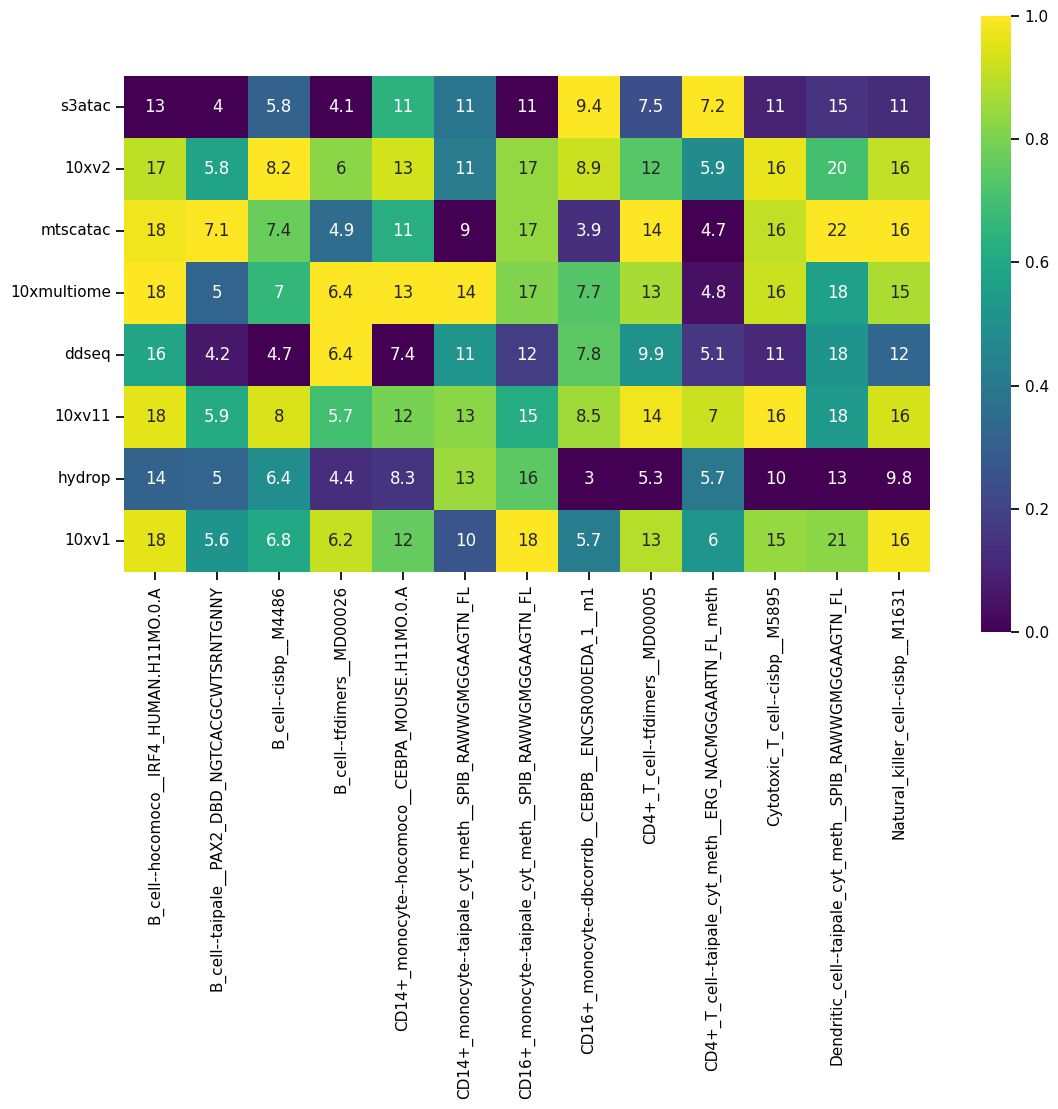

In [64]:
n_rows = len(nes_per_selectedmotif_normalized)
n_cols = len(nes_per_selectedmotif_normalized.columns)

f, ax = plt.subplots(figsize=(n_cols * 1, n_rows * 1))
sns.heatmap(
    nes_per_selectedmotif_normalized,
    ax=ax,
    square=True,
    cmap="viridis",
    annot=nes_per_selectedmotif,
)
# sns.heatmap(
#     nes_per_selectedmotif,
#     annot=True,
#     ax=ax,
#     fmt="g",
#     square=True,
#     cmap=None,
#     cbar=False,
#     alpha=0,
# )
# plt.tight_layout()
plt.savefig(
    "plots_pub/selected_motif_NES_mean_bysample.png",
    dpi=300,
    facecolor="white",
    bbox_inches="tight",
)

In [65]:
motifs_toplot_dict

{'B_cell': ['hocomoco__IRF4_HUMAN.H11MO.0.A',
  'taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY',
  'cisbp__M4486',
  'tfdimers__MD00026'],
 'CD14+_monocyte': ['hocomoco__CEBPA_MOUSE.H11MO.0.A',
  'taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL'],
 'CD16+_monocyte': ['taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL',
  'dbcorrdb__CEBPB__ENCSR000EDA_1__m1'],
 'CD4+_T_cell': ['tfdimers__MD00005',
  'taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth'],
 'Cytotoxic_T_cell': ['cisbp__M5895'],
 'Dendritic_cell': ['taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL'],
 'Natural_killer_cell': ['cisbp__M1631']}

In [66]:
# cell_type_sets = [
#     [
#         "B_cell--cisbp__M4489",
#         # "B_cell--hocomoco__BC11A_HUMAN.H11MO.0.A",
#         "B_cell--taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY",
#         "B_cell--cisbp__M5063",
#     ],
#     [
#         "CD14+_monocyte--transfac_pro__M01203",
#         "CD14+_monocyte--transfac_pro__M07080",
#     ],
#     [
#         "CD16+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",
#     ],
#     [
#         "CD4+_T_cell--hocomoco__TCF7_HUMAN.H11MO.0.A",
#         "CD4+_T_cell--taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth",
#         "CD4+_T_cell--transfac_pro__M01658",
#     ],
#     [
#         "Cytotoxic_T_cell--taipale_cyt_meth__TBX6_NAGGTGTGAN_eDBD",
#     ],
#     [
#         "Dendritic_cell--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL",
#         "Dendritic_cell--dbcorrdb__STAT3__ENCSR000DZV_1__m1",
#     ],
#     [
#         "Natural_killer_cell--cisbp__M1632",
#     ],
# ]

cell_type_sets = []
for cell_type in motifs_toplot_dict.keys():
    cell_type_sets.append(
        [cell_type + "--" + motif for motif in motifs_toplot_dict[cell_type]]
    )
cell_type_sets

[['B_cell--hocomoco__IRF4_HUMAN.H11MO.0.A',
  'B_cell--taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY',
  'B_cell--cisbp__M4486',
  'B_cell--tfdimers__MD00026'],
 ['CD14+_monocyte--hocomoco__CEBPA_MOUSE.H11MO.0.A',
  'CD14+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL'],
 ['CD16+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL',
  'CD16+_monocyte--dbcorrdb__CEBPB__ENCSR000EDA_1__m1'],
 ['CD4+_T_cell--tfdimers__MD00005',
  'CD4+_T_cell--taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth'],
 ['Cytotoxic_T_cell--cisbp__M5895'],
 ['Dendritic_cell--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL'],
 ['Natural_killer_cell--cisbp__M1631']]

In [67]:
motif_alias_dict = {
    "cisbp__M4489": "SPI1",
    "hocomoco__BC11A_HUMAN.H11MO.0.A": "SPI1",
    "taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY": "PAX2",
    "cisbp__M5063": "TCF4",
    "transfac_pro__M01203": "SPI1",
    "transfac_pro__M07080": "CEBPB",
    "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL": "SPI1",
    "hocomoco__TCF7_HUMAN.H11MO.0.A": "TCF7",
    "taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth": "ERG",
    "transfac_pro__M01658": "RUNX",
    "taipale_cyt_meth__TBX6_NAGGTGTGAN_eDBD": "TBX6/EOMES",
    "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL": "SPI1",
    "dbcorrdb__STAT3__ENCSR000DZV_1__m1": "STAT3",
    "cisbp__M1632": "TBX/EOMES",
}

motif_alias_dict = {}
for cell_type in motifs_toplot_dict.keys():
    for motif in motifs_toplot_dict[cell_type]:
        motif_alias_dict[motif] = motif
motif_alias_dict

{'hocomoco__IRF4_HUMAN.H11MO.0.A': 'hocomoco__IRF4_HUMAN.H11MO.0.A',
 'taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY': 'taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY',
 'cisbp__M4486': 'cisbp__M4486',
 'tfdimers__MD00026': 'tfdimers__MD00026',
 'hocomoco__CEBPA_MOUSE.H11MO.0.A': 'hocomoco__CEBPA_MOUSE.H11MO.0.A',
 'taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL': 'taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL',
 'dbcorrdb__CEBPB__ENCSR000EDA_1__m1': 'dbcorrdb__CEBPB__ENCSR000EDA_1__m1',
 'tfdimers__MD00005': 'tfdimers__MD00005',
 'taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth': 'taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth',
 'cisbp__M5895': 'cisbp__M5895',
 'cisbp__M1631': 'cisbp__M1631'}

In [68]:
motif_alias_dict = {
    "hocomoco__IRF4_HUMAN.H11MO.0.A": "SPIB/IRF",
    "taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY": "PAX2",
    "cisbp__M5063": "E-Box",
    "dbcorrdb__RELA__ENCSR000EBA_1__m2": "RELA",
    "hocomoco__CEBPA_MOUSE.H11MO.0.A": "CEBPA/B",
    "taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL": "SPIB/IRF",
    "dbcorrdb__CEBPB__ENCSR000EDA_1__m1": "CEBPA/B",
    "tfdimers__MD00005": "RUNX/TCF7?",
    "taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth": "ERG",
    "transfac_pro__M01286": "?",
    "cisbp__M5895": "TBX20",
    "dbcorrdb__STAT3__ENCSR000DZV_1__m1": "STAT3",
    "cisbp__M1631": "TBX20",
    "cisbp__M4486": "POU2F1/2",
    "tfdimers__MD00026": "SPIB/IRF",
}

In [69]:
tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]
cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

In [70]:
nes_per_selectedmotif

,B_cell--hocomoco__IRF4_HUMAN.H11MO.0.A,B_cell--taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY,B_cell--cisbp__M4486,B_cell--tfdimers__MD00026,CD14+_monocyte--hocomoco__CEBPA_MOUSE.H11MO.0.A,CD14+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,CD16+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,CD16+_monocyte--dbcorrdb__CEBPB__ENCSR000EDA_1__m1,CD4+_T_cell--tfdimers__MD00005,CD4+_T_cell--taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth,Cytotoxic_T_cell--cisbp__M5895,Dendritic_cell--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL,Natural_killer_cell--cisbp__M1631
s3atac,12.6,4.0,5.8,4.1,11.2,10.8,11.1,9.4,7.5,7.2,10.6,14.7,10.6
10xv2,17.2,5.8,8.2,6.0,12.9,10.9,16.8,8.9,12.0,5.9,16.1,19.5,15.6
mtscatac,17.6,7.1,7.4,4.9,11.1,9.0,16.8,3.9,14.4,4.7,15.7,22.1,16.2
10xmultiome,17.7,5.0,7.0,6.4,13.3,13.6,16.6,7.7,13.2,4.8,15.8,18.3,15.4
ddseq,15.6,4.2,4.7,6.4,7.4,11.4,12.3,7.8,9.9,5.1,10.7,17.9,11.9
10xv11,17.5,5.9,8.0,5.7,12.1,12.8,15.3,8.5,14.2,7.0,16.3,18.1,15.8
hydrop,14.2,5.0,6.4,4.4,8.3,12.9,16.2,3.0,5.3,5.7,10.0,13.4,9.8
10xv1,17.5,5.6,6.8,6.2,11.9,10.2,17.9,5.7,13.4,6.0,15.3,20.6,16.1


In [71]:
cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

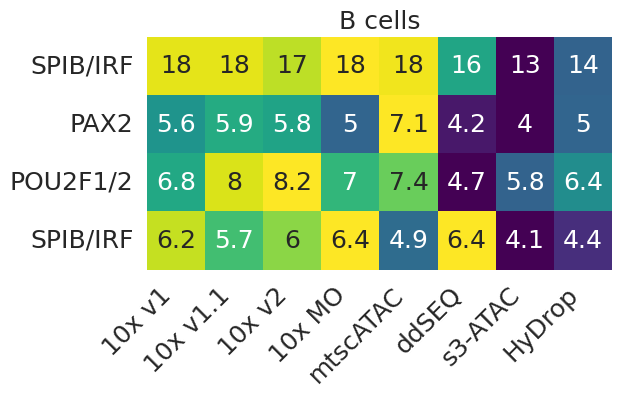

https://motifcollections.aertslab.org/v9/logos/hocomoco__IRF4_HUMAN.H11MO.0.A.png


https://motifcollections.aertslab.org/v9/logos/taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY.png


https://motifcollections.aertslab.org/v9/logos/cisbp__M4486.png


https://motifcollections.aertslab.org/v9/logos/tfdimers__MD00026.png


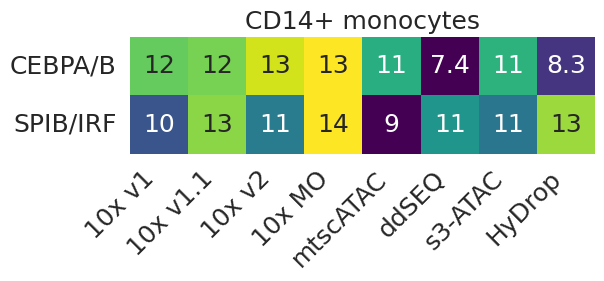

https://motifcollections.aertslab.org/v9/logos/hocomoco__CEBPA_MOUSE.H11MO.0.A.png


https://motifcollections.aertslab.org/v9/logos/taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL.png


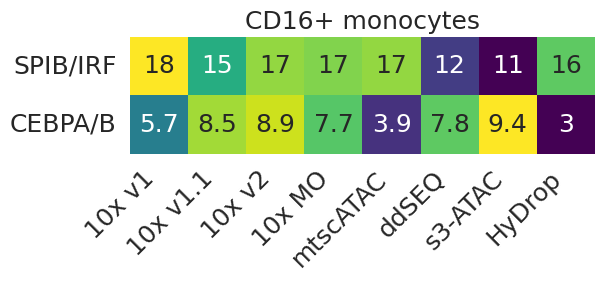

https://motifcollections.aertslab.org/v9/logos/taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL.png


https://motifcollections.aertslab.org/v9/logos/dbcorrdb__CEBPB__ENCSR000EDA_1__m1.png


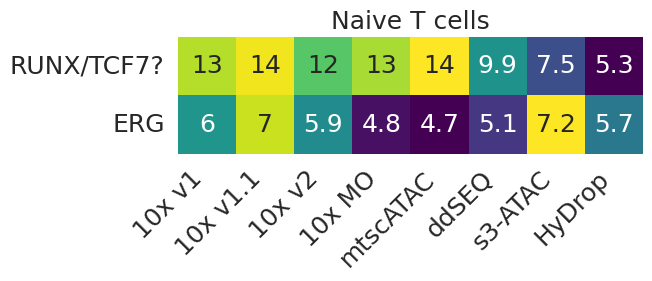

https://motifcollections.aertslab.org/v9/logos/tfdimers__MD00005.png


https://motifcollections.aertslab.org/v9/logos/taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth.png


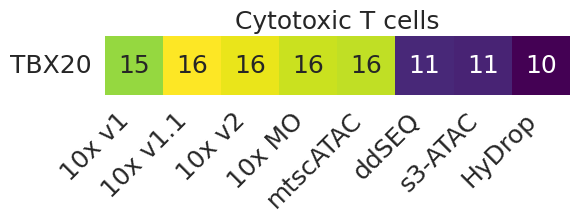

https://motifcollections.aertslab.org/v9/logos/cisbp__M5895.png


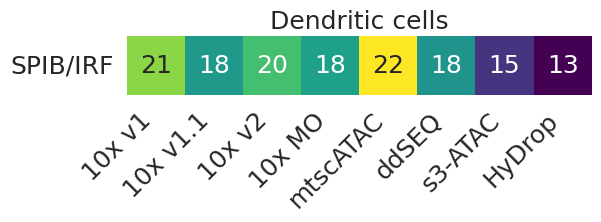

https://motifcollections.aertslab.org/v9/logos/taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL.png


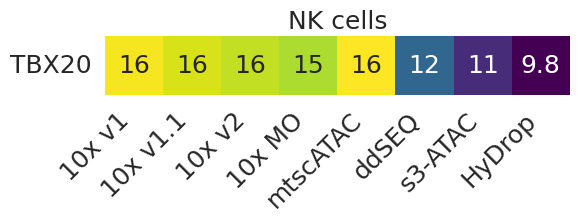

https://motifcollections.aertslab.org/v9/logos/cisbp__M1631.png


In [72]:
df_sub_cat = pd.DataFrame()
df_sub_cat_merged = pd.DataFrame()
df_sub_normalized_cat = pd.DataFrame()
df_sub_normalized_cat_merged = pd.DataFrame()
sns.set(font_scale=1.5)
for cell_type_set in cell_type_sets:
    set_number = cell_type_sets.index(cell_type_set)
    cell_type = cell_type_set[0].split("--")[0]

    df_sub = nes_per_selectedmotif[cell_type_set]
    motifs = [x.split("--")[-1] for x in df_sub.columns]
    df_sub = df_sub.loc[tech_order]
    df_sub.index = [tech_alias_dict[x] for x in df_sub.index]
    df_sub.columns = [motif_alias_dict[x.split("--")[-1]] for x in df_sub.columns]
    df_sub_normalized = df_sub.transform(lambda x: minmax_scale(x.astype(float)))

    df_sub_cat = pd.concat([df_sub_cat, df_sub.T])
    df_sub_normalized_cat = pd.concat([df_sub_normalized_cat, df_sub_normalized.T])

    n_rows = len(df_sub)
    n_cols = len(df_sub.columns)

    n_rows = len(nes_per_selectedmotif)
    n_cols = len(nes_per_selectedmotif.columns)

    f, ax = plt.subplots(figsize=(n_rows * 0.75, n_cols * 0.75))

    sns.heatmap(
        df_sub_normalized.T,
        ax=ax,
        square=True,
        cmap="viridis",
        cbar=False,
        annot=df_sub.T,
        annot_kws={"fontsize": 18},
    )
    sns.set(font_scale=1.2)

    # sns.heatmap(
    #     df_sub.round(1),
    #     annot=True,
    #     ax=ax,
    #     fmt="g",
    #     square=True,
    #     cmap=None,
    #     cbar=False,
    #     alpha=0,
    # )

    plt.xticks(rotation=45, fontsize=18, ha="right")
    plt.yticks(rotation=0, fontsize=18, ha="right")

    # plt.tight_layout()
    plt.title(f"{cell_type_alias_dict[cell_type]}", fontsize=18)
    plt.savefig(
        f"plots_pub/selected_motif_NES_mean_{set_number}.svg",
        dpi=600,
        facecolor="white",
    )
    plt.show()
    plt.close()

    for motif in motifs:
        motif_url = f"https://motifcollections.aertslab.org/v9/logos/{motif}.png"
        print(motif_url)
        display(Image(url=motif_url))

    df_sub_normalized_cat_merged = pd.concat(
        [df_sub_normalized_cat_merged, df_sub_normalized_cat]
    )

    df_sub_cat_merged = pd.concat([df_sub_cat_merged, df_sub_cat])

In [73]:
df_sub_normalized_cat_merged.to_csv("derop_sourcedata_fig3g.csv")

In [76]:
df_sub_cat_merged.to_csv("derop_sourcedata_fig3g.csv")

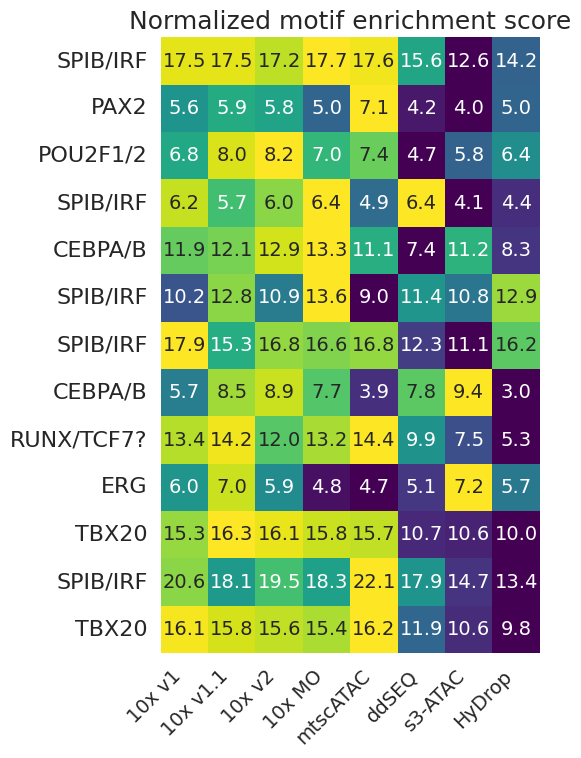

In [74]:
n_rows = len(df_sub_cat)
n_cols = len(df_sub_cat.columns)

f, ax = plt.subplots(figsize=(n_rows * 1, n_cols * 1))

sns.heatmap(
    df_sub_normalized_cat.fillna(0),
    ax=ax,
    square=True,
    cmap="viridis",
    cbar=False,
    annot=df_sub_cat.fillna(0),
    annot_kws={"fontsize": 14},
    fmt=".1f",
)
sns.set(font_scale=1.2)

# sns.heatmap(
#     df_sub.round(1),
#     annot=True,
#     ax=ax,
#     fmt="g",
#     square=True,
#     cmap=None,
#     cbar=False,
#     alpha=0,
# )

plt.xticks(rotation=45, fontsize=14, ha="right")
plt.yticks(fontsize=16, ha="right")

# plt.tight_layout()
plt.title(f"Normalized motif enrichment score", fontsize=18)
plt.savefig(
    f"plots_pub/selected_motif_NES_mean_merged.svg",
    dpi=600,
    facecolor="white",
)
plt.show()
plt.close()

In [75]:
cell_type_sets

[['B_cell--hocomoco__IRF4_HUMAN.H11MO.0.A',
  'B_cell--taipale__PAX2_DBD_NGTCACGCWTSRNTGNNY',
  'B_cell--cisbp__M4486',
  'B_cell--tfdimers__MD00026'],
 ['CD14+_monocyte--hocomoco__CEBPA_MOUSE.H11MO.0.A',
  'CD14+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL'],
 ['CD16+_monocyte--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL',
  'CD16+_monocyte--dbcorrdb__CEBPB__ENCSR000EDA_1__m1'],
 ['CD4+_T_cell--tfdimers__MD00005',
  'CD4+_T_cell--taipale_cyt_meth__ERG_NACMGGAARTN_FL_meth'],
 ['Cytotoxic_T_cell--cisbp__M5895'],
 ['Dendritic_cell--taipale_cyt_meth__SPIB_RAWWGMGGAAGTN_FL'],
 ['Natural_killer_cell--cisbp__M1631']]